# <center>MartinByrne_DVisHDip_CA2 </center> 

----
### <u><center>Additional Packages Needed</center></u> 
----

The below cell will hold any packages which may need to be installed on a system, they can be commented or uncommented as needed.

In [ ]:
# https://pypi.org/project/missingno/
# ! pip install missingno

# https://pypi.org/project/altair/
# ! pip install altair

# https://pypi.org/project/pandas-bokeh/
# https://github.com/PatrikHlobil/Pandas-Bokeh
# ! pip install pandas-bokeh

# https://pypi.org/project/plotly-express/
# ! pip install plotly-express

# https://www.statsmodels.org/stable/install.html
# ! pip install statsmodels

# https://github.com/plotly/jupyter-dash
# ! pip install jupyter-dash

# https://pypi.org/project/pivottablejs/
# ! pip install pivottablejs

----
### <u><center>Imports</center></u> 
----

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import altair as alt
import pandas_bokeh as pb
import plotly.graph_objects as go
import plotly.express as px

from statsmodels.stats.outliers_influence import variance_inflation_factor

from pivottablejs import pivot_ui

# Suppress some library warnings
import warnings
warnings.simplefilter(action='ignore')

# Disable scientific notation when displaying large numbers
pd.set_option('display.float_format', lambda x: '%.4f' % x)

----
## <u><center>EDA</center></u> 
### <u><center>Exploratory Data Analysis</center></u>
----

#### Import data

In [2]:
data = pd.read_csv('consolidated_coin_data.csv')

#### Make a copy of dataset for EDA

In [3]:
dataset_eda = data.copy()

#### Check dataset dimensionality

In [4]:
dataset_eda.shape

(28944, 8)

#### Check the dataset type

In [5]:
type(dataset_eda)

pandas.core.frame.DataFrame

#### Check basic statistics both with and without any non-numeric columns

In [6]:
dataset_eda.describe()

Currency          Date   Open   High    Low  Close Volume Market Cap
count     28944         28944  28944  28944  28944  28944  28944      28944
unique       12          2412  12307  12057  12803  12294  16349      16058
top       tezos  Feb 26, 2015      1      1      1      1      0    451,600
freq       2412            14   1725   1511   1367   1729   2916        394

In [7]:
dataset_eda.describe(include=object)

Currency          Date   Open   High    Low  Close Volume Market Cap
count     28944         28944  28944  28944  28944  28944  28944      28944
unique       12          2412  12307  12057  12803  12294  16349      16058
top       tezos  Feb 26, 2015      1      1      1      1      0    451,600
freq       2412            14   1725   1511   1367   1729   2916        394

#### Check dataset column data types

In [8]:
dataset_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Currency    28944 non-null  object
 1   Date        28944 non-null  object
 2   Open        28944 non-null  object
 3   High        28944 non-null  object
 4   Low         28944 non-null  object
 5   Close       28944 non-null  object
 6   Volume      28944 non-null  object
 7   Market Cap  28944 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB


#### Check head and tail values

In [9]:
dataset_eda.head(10)

Currency          Date  Open  High   Low Close      Volume   Market Cap
0    tezos  Dec 04, 2019  1.29  1.32  1.25  1.25  46,048,752  824,588,509
1    tezos  Dec 03, 2019  1.24  1.32  1.21  1.29  41,462,224  853,213,342
2    tezos  Dec 02, 2019  1.25  1.26   1.2  1.24  27,574,097  817,872,179
3    tezos  Dec 01, 2019  1.33  1.34  1.25  1.25  24,127,567  828,296,390
4    tezos  Nov 30, 2019  1.31  1.37  1.31  1.33  28,706,667  879,181,680
5    tezos  Nov 29, 2019  1.28  1.34  1.28  1.31  32,270,224  867,085,098
6    tezos  Nov 28, 2019  1.26  1.35  1.22  1.28  44,240,281  845,073,679
7    tezos  Nov 27, 2019  1.24  1.27  1.16  1.26  47,723,271  829,672,736
8    tezos  Nov 26, 2019  1.24  1.28  1.23  1.24  54,828,808  822,065,277
9    tezos  Nov 25, 2019  1.33  1.33  1.21  1.24  64,954,006  815,688,075

In [10]:
dataset_eda.tail(10)

Currency          Date  Open  High   Low Close Volume  Market Cap
28934  bitcoin-sv  May 07, 2013  3.37  3.41  2.94  3.33      0  58,051,265
28935  bitcoin-sv  May 06, 2013  3.59  3.78  3.12  3.37      0  58,594,361
28936  bitcoin-sv  May 05, 2013  3.49  3.69  3.35  3.59      0  62,298,185
28937  bitcoin-sv  May 04, 2013  3.03  3.64   2.9  3.48      0  60,290,868
28938  bitcoin-sv  May 03, 2013  3.39  3.45   2.4  3.04      0  52,694,847
28939  bitcoin-sv  May 02, 2013  3.78  4.04  3.01  3.37      0  58,287,979
28940  bitcoin-sv  May 01, 2013  4.29  4.36  3.52   3.8      0  65,604,596
28941  bitcoin-sv  Apr 30, 2013   4.4  4.57  4.17   4.3      0  74,020,918
28942  bitcoin-sv  Apr 29, 2013  4.37  4.57  4.23  4.38      0  75,388,964
28943  bitcoin-sv  Apr 28, 2013   4.3   4.4  4.18  4.35      0  74,636,938

#### Check the dataset for cells that have a NaN  value

In [11]:
pd.isnull(dataset_eda).any()

Currency      False
Date          False
Open          False
High          False
Low           False
Close         False
Volume        False
Market Cap    False
dtype: bool

#### See the amount of NaN values, per column using .sum(), then see the total for the dataset by adding a second .sum()

In [12]:
print(dataset_eda.isnull().sum());
print('Total null values : ', dataset_eda.isnull().sum().sum())

Currency      0
Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64
Total null values :  0


#### Show dataset missing values (If any) graphically

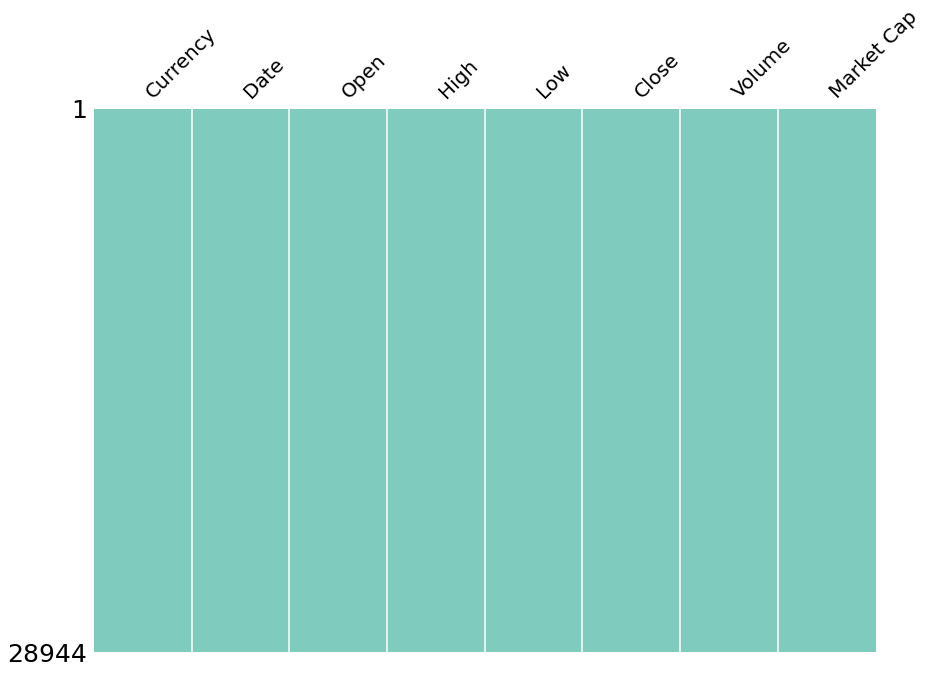

In [13]:
msno.matrix(dataset_eda, figsize=(14, 10), fontsize=20, sparkline=False, color=(0.5, 0.8, 0.75));

-----
## <u><center>Questions</center></u> 
-----

### Generate a plot that details change in the “High” value for the top 5 currencies (by high value) between 2015 and 2019

#### Create dataset copy

In [14]:
dataset_highval = data.copy()

#### Quickly check the dataset info

In [15]:
dataset_highval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Currency    28944 non-null  object
 1   Date        28944 non-null  object
 2   Open        28944 non-null  object
 3   High        28944 non-null  object
 4   Low         28944 non-null  object
 5   Close       28944 non-null  object
 6   Volume      28944 non-null  object
 7   Market Cap  28944 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB


#### The high value column needs to be converted to numeric format

In [16]:
dataset_highval['High'] = dataset_highval['High'].str.replace(',', '').astype(float)

#### The date column also needs to be converted into a datetime format

In [17]:
dataset_highval['Date']= pd.to_datetime(dataset_highval['Date'])

#### Check dataset info to ensure that conversion of column data types was successful

In [18]:
dataset_highval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Currency    28944 non-null  object        
 1   Date        28944 non-null  datetime64[ns]
 2   Open        28944 non-null  object        
 3   High        28944 non-null  float64       
 4   Low         28944 non-null  object        
 5   Close       28944 non-null  object        
 6   Volume      28944 non-null  object        
 7   Market Cap  28944 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 1.8+ MB


#### Select the Currency, High and Date columns from the dataset

In [19]:
processed_dataset = dataset_highval[['Currency', 'Date', 'High']]
processed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Currency  28944 non-null  object        
 1   Date      28944 non-null  datetime64[ns]
 2   High      28944 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 678.5+ KB


#### Convert the date format from a month year format to datetime

In [20]:
pd.to_datetime(processed_dataset.Date)
processed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Currency  28944 non-null  object        
 1   Date      28944 non-null  datetime64[ns]
 2   High      28944 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 678.5+ KB


In [21]:
processed_dataset.Date.head()

0   2019-12-04
1   2019-12-03
2   2019-12-02
3   2019-12-01
4   2019-11-30
Name: Date, dtype: datetime64[ns]

#### Select each year from 2015 to 2019 and check the first few values

In [22]:
dataset_2015 = processed_dataset.loc[processed_dataset['Date'].between('2015-01-01','2015-12-31', inclusive=True)]
dataset_2016 = processed_dataset.loc[processed_dataset['Date'].between('2016-01-01','2016-12-31', inclusive=True)]
dataset_2017 = processed_dataset.loc[processed_dataset['Date'].between('2017-01-01','2017-12-31', inclusive=True)]
dataset_2018 = processed_dataset.loc[processed_dataset['Date'].between('2018-01-01','2018-12-31', inclusive=True)]
dataset_2019 = processed_dataset.loc[processed_dataset['Date'].between('2019-01-01','2019-12-31', inclusive=True)]

In [23]:
print(dataset_2015.head())
print(dataset_2016.head())
print(dataset_2017.head())
print(dataset_2018.head())
print(dataset_2019.head())

     Currency       Date   High
1434    tezos 2015-12-31 0.0018
1435    tezos 2015-12-30 0.0018
1436    tezos 2015-12-29 0.0018
1437    tezos 2015-12-28 0.0018
1438    tezos 2015-12-27 0.0017
     Currency       Date   High
1068    tezos 2016-12-31 0.0025
1069    tezos 2016-12-30 0.0026
1070    tezos 2016-12-29 0.0026
1071    tezos 2016-12-28 0.0026
1072    tezos 2016-12-27 0.0027
    Currency       Date   High
703    tezos 2017-12-31 4.2400
704    tezos 2017-12-30 4.1700
705    tezos 2017-12-29 4.4300
706    tezos 2017-12-28 3.9200
707    tezos 2017-12-27 4.3300
    Currency       Date   High
338    tezos 2018-12-31 0.4995
339    tezos 2018-12-30 0.5105
340    tezos 2018-12-29 0.5226
341    tezos 2018-12-28 0.5095
342    tezos 2018-12-27 0.5280
  Currency       Date   High
0    tezos 2019-12-04 1.3200
1    tezos 2019-12-03 1.3200
2    tezos 2019-12-02 1.2600
3    tezos 2019-12-01 1.3400
4    tezos 2019-11-30 1.3700


#### Get the top High values for currencies for each year between 2015 and 2019

In [24]:
sorted_dataset_2015 = dataset_2015.groupby("Currency")['High'].nlargest(1)
sorted_dataset_2015.sort_values(ascending=False).head(10)

Currency           
bitcoin       8727    495.5600
ethereum      23506   320.4300
binance-coin  4020      8.7300
bitcoin-sv    28140     8.7300
eos           6432      8.7300
litecoin      20904     8.7300
bitcoin-cash  16210     1.2200
tether        11386     1.2200
xrp           13858     0.0245
cardano       25911     0.0058
Name: High, dtype: float64

In [25]:
sorted_dataset_2016 = dataset_2016.groupby("Currency")['High'].nlargest(1)
sorted_dataset_2016.sort_values(ascending=False).head(10)

Currency           
bitcoin       8306    979.4000
ethereum      22973    21.5200
binance-coin  3677      5.9500
bitcoin-sv    27797     5.9500
eos           6089      5.9500
litecoin      20561     5.9500
bitcoin-cash  15771     1.0100
tether        10947     1.0100
xrp           13196     0.0095
cardano       25282     0.0034
Name: High, dtype: float64

In [26]:
sorted_dataset_2017 = dataset_2017.groupby("Currency")['High'].nlargest(1)
sorted_dataset_2017.sort_values(ascending=False).head(10)

Currency           
bitcoin       7953    20089.0000
bitcoin-cash  15186    4355.6200
ethereum      22423     881.9400
litecoin      20011     375.2900
binance-coin  3310       53.5500
bitcoin-sv    27430      53.5500
eos           5722       53.5500
tezos         717        12.1900
xrp           12764       2.8500
tether        10569       1.2100
Name: High, dtype: float64

In [27]:
sorted_dataset_2018 = dataset_2018.groupby("Currency")['High'].nlargest(1)
sorted_dataset_2018.sort_values(ascending=False).head(10)

Currency           
bitcoin       7933    17712.4000
bitcoin-cash  15168    3071.1600
ethereum      22398    1432.8800
litecoin      19993     323.1100
bitcoin-sv    26917     243.7900
binance-coin  3103       24.9100
eos           5408       22.8900
tezos         699         7.5500
xrp           12759       3.8400
cardano       24819       1.3300
Name: High, dtype: float64

In [28]:
sorted_dataset_2019 = dataset_2019.groupby("Currency")['High'].nlargest(1)
sorted_dataset_2019.sort_values(ascending=False).head(10)

Currency           
bitcoin       7397    13796.4900
bitcoin-cash  14637     522.0900
ethereum      21869     361.4000
bitcoin-sv    26697     255.8800
litecoin      19461     146.4300
binance-coin  2577       39.5700
eos           5010        8.5900
tezos         198         1.8300
tether        9719        1.0600
xrp           12225       0.5055
Name: High, dtype: float64

#### Add each of the years values to a dictionary, convert to a dataframe using years as the index

In [29]:
high_dataset_dictionary = {
    'bitcoin': [495.56, 979.40, 20089.00, 17712.40, 13796.49], 
    'ethereum': [320.43, 21.52, 881.94,1432.88, 361.40],
    'bitcoin-sv': [8.73, 5.95, 53.55, 243.79, 255.88], 
    'litecoin':[8.73, 5.95, 375.29, 323.11, 146.43], 
    'bitcoin-cash':[1.22, 1.01, 4355.63, 3071.16, 522.09]
}

In [30]:
years = [2015, 2016, 2017, 2018, 2019]
high_dataset = pd.DataFrame(high_dataset_dictionary, index=years)

high_dataset.head()


bitcoin  ethereum  bitcoin-sv  litecoin  bitcoin-cash
2015   495.5600  320.4300      8.7300    8.7300        1.2200
2016   979.4000   21.5200      5.9500    5.9500        1.0100
2017 20089.0000  881.9400     53.5500  375.2900     4355.6300
2018 17712.4000 1432.8800    243.7900  323.1100     3071.1600
2019 13796.4900  361.4000    255.8800  146.4300      522.0900

#### Create plot showing the trend of the top 5 currencies

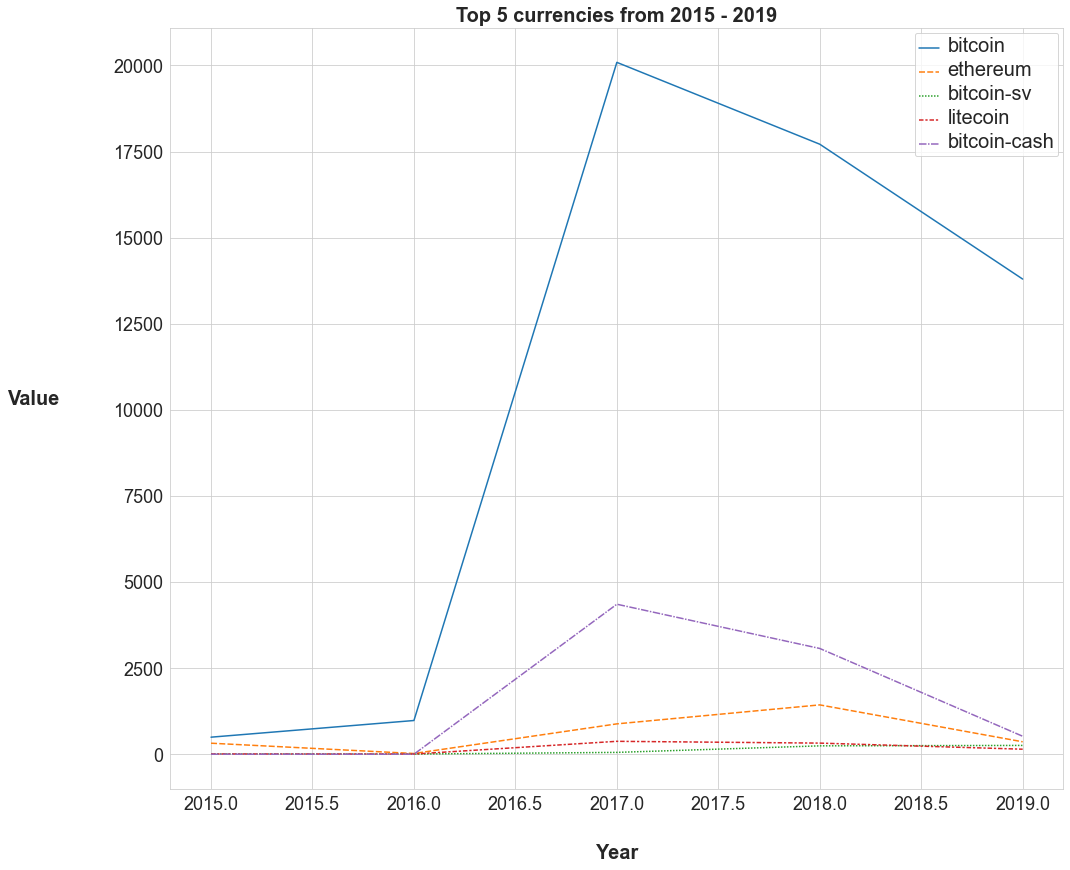

In [31]:
plt.figure(figsize=(16, 14))
# set the background style of the plot
sns.set_style('whitegrid')
 
# plot the graph using the default estimator mean
plot = sns.lineplot(data=high_dataset)

# Enlarge the legend panel & text
plt.setp(plot.get_legend().get_texts(), fontsize='20') 

plt.title('Top 5 currencies from 2015 - 2019', fontweight='bold', fontsize='20')

plt.xticks(fontsize=18)
plt.xlabel(xlabel ='Year',fontsize=20, labelpad=30, fontweight='bold')
plt.yticks(fontsize=18)
plt.ylabel(ylabel ='Value',fontsize=20, fontweight='bold', labelpad=80, rotation='horizontal')

plt.show()

### Compare the “Open” and “Close” values for all the currencies, by month, for the year 2018

#### Create dataset copy

In [32]:
dataset_open_close = data.copy()

#### Check dataset info

In [33]:
dataset_open_close.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Currency    28944 non-null  object
 1   Date        28944 non-null  object
 2   Open        28944 non-null  object
 3   High        28944 non-null  object
 4   Low         28944 non-null  object
 5   Close       28944 non-null  object
 6   Volume      28944 non-null  object
 7   Market Cap  28944 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB


#### Check the first few values of the dataset

In [34]:
dataset_open_close.head()

Currency          Date  Open  High   Low Close      Volume   Market Cap
0    tezos  Dec 04, 2019  1.29  1.32  1.25  1.25  46,048,752  824,588,509
1    tezos  Dec 03, 2019  1.24  1.32  1.21  1.29  41,462,224  853,213,342
2    tezos  Dec 02, 2019  1.25  1.26   1.2  1.24  27,574,097  817,872,179
3    tezos  Dec 01, 2019  1.33  1.34  1.25  1.25  24,127,567  828,296,390
4    tezos  Nov 30, 2019  1.31  1.37  1.31  1.33  28,706,667  879,181,680

#### The Open value column needs to be converted to numeric format

In [35]:
dataset_open_close['Open'] = dataset_open_close['Open'].str.replace(',', '').astype(float)
dataset_open_close.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Currency    28944 non-null  object 
 1   Date        28944 non-null  object 
 2   Open        28944 non-null  float64
 3   High        28944 non-null  object 
 4   Low         28944 non-null  object 
 5   Close       28944 non-null  object 
 6   Volume      28944 non-null  object 
 7   Market Cap  28944 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.8+ MB


#### The Close value column also needs to be converted to numeric format

In [36]:
dataset_open_close['Close'] = dataset_open_close['Close'].str.replace(',', '').astype(float)
dataset_open_close.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Currency    28944 non-null  object 
 1   Date        28944 non-null  object 
 2   Open        28944 non-null  float64
 3   High        28944 non-null  object 
 4   Low         28944 non-null  object 
 5   Close       28944 non-null  float64
 6   Volume      28944 non-null  object 
 7   Market Cap  28944 non-null  object 
dtypes: float64(2), object(6)
memory usage: 1.8+ MB


#### Convert the date format from a month year format to datetime

In [37]:
dataset_open_close.Date = pd.to_datetime(dataset_open_close.Date)
dataset_open_close.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Currency    28944 non-null  object        
 1   Date        28944 non-null  datetime64[ns]
 2   Open        28944 non-null  float64       
 3   High        28944 non-null  object        
 4   Low         28944 non-null  object        
 5   Close       28944 non-null  float64       
 6   Volume      28944 non-null  object        
 7   Market Cap  28944 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 1.8+ MB


In [38]:
dataset_open_close.head()

Currency       Date   Open  High   Low  Close      Volume   Market Cap
0    tezos 2019-12-04 1.2900  1.32  1.25 1.2500  46,048,752  824,588,509
1    tezos 2019-12-03 1.2400  1.32  1.21 1.2900  41,462,224  853,213,342
2    tezos 2019-12-02 1.2500  1.26   1.2 1.2400  27,574,097  817,872,179
3    tezos 2019-12-01 1.3300  1.34  1.25 1.2500  24,127,567  828,296,390
4    tezos 2019-11-30 1.3100  1.37  1.31 1.3300  28,706,667  879,181,680

#### Select the Currency, Open, Close and Date columns from the dataset

In [39]:
processed_open_close_dataset = dataset_open_close[['Currency','Date', 'Open', 'Close']]
processed_open_close_dataset.head()

Currency       Date   Open  Close
0    tezos 2019-12-04 1.2900 1.2500
1    tezos 2019-12-03 1.2400 1.2900
2    tezos 2019-12-02 1.2500 1.2400
3    tezos 2019-12-01 1.3300 1.2500
4    tezos 2019-11-30 1.3100 1.3300

#### Using Altair for visualisations, start with creating a 2018 dataset

In [40]:
open_close_dataset_2018 = processed_open_close_dataset.loc[processed_open_close_dataset['Date'].between('2018-01-01','2018-12-31', inclusive=True)]
open_close_dataset_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4380 entries, 338 to 27234
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Currency  4380 non-null   object        
 1   Date      4380 non-null   datetime64[ns]
 2   Open      4380 non-null   float64       
 3   Close     4380 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 171.1+ KB


In [41]:
open_close_dataset_2018.set_index('Date')

Currency   Open   Close
Date                                 
2018-12-31       tezos 0.4985  0.4626
2018-12-30       tezos 0.5101  0.4982
2018-12-29       tezos 0.5091  0.5103
2018-12-28       tezos 0.4693  0.5086
2018-12-27       tezos 0.5249  0.4708
...                ...    ...     ...
2018-01-05  bitcoin-sv 9.1500 14.9200
2018-01-04  bitcoin-sv 9.4500  9.2100
2018-01-03  bitcoin-sv 8.7700  9.5400
2018-01-02  bitcoin-sv 8.4600  8.8400
2018-01-01  bitcoin-sv 8.6300  8.4100

[4380 rows x 3 columns]

#### Create a column holding the difference between closing values and opening values

In [42]:
open_close_dataset_2018['Difference'] = open_close_dataset_2018['Close'] - open_close_dataset_2018['Open']

#### Altair Open Values - 2018

In [94]:
alt.Chart(open_close_dataset_2018).mark_point().encode(
    x='Date',
    y='Open',
    color='Currency',
).properties(
    width=720,
    height=500,
    title="Open Values 2018"
).configure_axis(
    titleFontSize=16
)

alt.Chart(...)

#### Altair Close Values - 2018

In [93]:
alt.Chart(open_close_dataset_2018).mark_point().encode(
    x='Date',
    y='Close',
    color='Currency',
).properties(
    width=720,
    height=500,
    title="Close Values 2018"
).configure_axis(
    titleFontSize=16
)

alt.Chart(...)

#### Altair Close & Open Values Differences 2018

In [92]:
alt.Chart(open_close_dataset_2018).mark_point().encode(
    x='Date',
    y='Difference',
    color='Currency',
).properties(
    width=720,
    height=500,
    title="Close & Open differences 2018"
).configure_axis(
    titleFontSize=16
)

alt.Chart(...)

### Plot a graph depicting the “Volume” by Currency between 2016 and 2019 for the top 3 Currencies (by volume) for those years.

#### Create dataset copy

In [46]:
dataset_volume = data.copy()

#### Check dataset information

In [47]:
dataset_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Currency    28944 non-null  object
 1   Date        28944 non-null  object
 2   Open        28944 non-null  object
 3   High        28944 non-null  object
 4   Low         28944 non-null  object
 5   Close       28944 non-null  object
 6   Volume      28944 non-null  object
 7   Market Cap  28944 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB


#### Convert date into a datetime format

In [48]:
dataset_volume['Date'] = pd.to_datetime(dataset_volume['Date'])
dataset_volume.head()

Currency       Date  Open  High   Low Close      Volume   Market Cap
0    tezos 2019-12-04  1.29  1.32  1.25  1.25  46,048,752  824,588,509
1    tezos 2019-12-03  1.24  1.32  1.21  1.29  41,462,224  853,213,342
2    tezos 2019-12-02  1.25  1.26   1.2  1.24  27,574,097  817,872,179
3    tezos 2019-12-01  1.33  1.34  1.25  1.25  24,127,567  828,296,390
4    tezos 2019-11-30  1.31  1.37  1.31  1.33  28,706,667  879,181,680

#### Convert volume column to numeric format

In [49]:
dataset_volume['Volume'] = dataset_volume['Volume'].str.replace(',', '').astype(float)
dataset_volume.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Currency    28944 non-null  object        
 1   Date        28944 non-null  datetime64[ns]
 2   Open        28944 non-null  object        
 3   High        28944 non-null  object        
 4   Low         28944 non-null  object        
 5   Close       28944 non-null  object        
 6   Volume      28944 non-null  float64       
 7   Market Cap  28944 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 1.8+ MB


In [50]:
dataset_volume.head()

Currency       Date  Open  High   Low Close        Volume   Market Cap
0    tezos 2019-12-04  1.29  1.32  1.25  1.25 46048752.0000  824,588,509
1    tezos 2019-12-03  1.24  1.32  1.21  1.29 41462224.0000  853,213,342
2    tezos 2019-12-02  1.25  1.26   1.2  1.24 27574097.0000  817,872,179
3    tezos 2019-12-01  1.33  1.34  1.25  1.25 24127567.0000  828,296,390
4    tezos 2019-11-30  1.31  1.37  1.31  1.33 28706667.0000  879,181,680

#### Select the needed columns

In [51]:
top3_dataset = dataset_volume[['Currency', 'Volume', 'Date']]

In [52]:
top3_dataset.head()

Currency        Volume       Date
0    tezos 46048752.0000 2019-12-04
1    tezos 41462224.0000 2019-12-03
2    tezos 27574097.0000 2019-12-02
3    tezos 24127567.0000 2019-12-01
4    tezos 28706667.0000 2019-11-30

#### Create datasets for each of the years that are needed

In [53]:
volume_dataset_2016 = top3_dataset.loc[top3_dataset['Date'].between('2016-01-01','2016-12-31', inclusive=True)]
volume_dataset_2017 = top3_dataset.loc[top3_dataset['Date'].between('2017-01-01','2017-12-31', inclusive=True)]
volume_dataset_2018 = top3_dataset.loc[top3_dataset['Date'].between('2018-01-01','2018-12-31', inclusive=True)]
volume_dataset_2019 = top3_dataset.loc[top3_dataset['Date'].between('2019-01-01','2019-12-31', inclusive=True)]

In [54]:
print(volume_dataset_2016.head())
print(volume_dataset_2017.head())
print(volume_dataset_2018.head())
print(volume_dataset_2019.head())

     Currency      Volume       Date
1068    tezos  43346.2000 2016-12-31
1069    tezos  55767.9000 2016-12-30
1070    tezos 144014.0000 2016-12-29
1071    tezos  66922.5000 2016-12-28
1072    tezos 126849.0000 2016-12-27
    Currency       Volume       Date
703    tezos  519750.0000 2017-12-31
704    tezos  713963.0000 2017-12-30
705    tezos  945485.0000 2017-12-29
706    tezos  579467.0000 2017-12-28
707    tezos 1123050.0000 2017-12-27
    Currency       Volume       Date
338    tezos  955456.0000 2018-12-31
339    tezos  697478.0000 2018-12-30
340    tezos  792592.0000 2018-12-29
341    tezos 1103081.0000 2018-12-28
342    tezos 1082895.0000 2018-12-27
  Currency        Volume       Date
0    tezos 46048752.0000 2019-12-04
1    tezos 41462224.0000 2019-12-03
2    tezos 27574097.0000 2019-12-02
3    tezos 24127567.0000 2019-12-01
4    tezos 28706667.0000 2019-11-30


#### Select the top currencies by volume for each year in the period

In [55]:
sorted_volume_dataset_2016 = volume_dataset_2016.groupby("Currency")['Volume'].nlargest(1)
sorted_volume_dataset_2016.sort_values(ascending=False).head(10)

Currency           
bitcoin       8501    363320992.0000
ethereum      22973   199408000.0000
binance-coin  3487     19773600.0000
bitcoin-sv    27607    19773600.0000
eos           5899     19773600.0000
litecoin      20371    19773600.0000
xrp           13235    15967600.0000
bitcoin-cash  15691     7399410.0000
tether        10867     7399410.0000
cardano       25212     2369690.0000
Name: Volume, dtype: float64

In [56]:
sorted_volume_dataset_2017 = volume_dataset_2017.groupby("Currency")['Volume'].nlargest(1)
sorted_volume_dataset_2017.sort_values(ascending=False).head(10)

Currency           
bitcoin       7948    22197999616.0000
bitcoin-cash  15186   11889600512.0000
xrp           12764    8108389888.0000
litecoin      20018    6961679872.0000
ethereum      22430    5179829760.0000
tether        10360    4687949824.0000
binance-coin  3312     1730780032.0000
bitcoin-sv    27432    1730780032.0000
eos           5724     1730780032.0000
cardano       24824     645155968.0000
Name: Volume, dtype: float64

In [57]:
sorted_volume_dataset_2018 = volume_dataset_2018.groupby("Currency")['Volume'].nlargest(1)
sorted_volume_dataset_2018.sort_values(ascending=False).head()

Currency           
bitcoin       7934    23840899072.0000
ethereum      22401    9214950400.0000
xrp           12745    9110439936.0000
tether        9997     6967777735.0000
bitcoin-cash  15171    5377260032.0000
Name: Volume, dtype: float64

In [58]:
sorted_volume_dataset_2019 = volume_dataset_2019.groupby("Currency")['Volume'].nlargest(1)
sorted_volume_dataset_2019.sort_values(ascending=False).head()

Currency       
tether    9687    53509128965.0000
bitcoin   7397    45105733173.0000
ethereum  21910   18661465873.0000
xrp       12069    9415068271.0000
litecoin  19498    6442000276.0000
Name: Volume, dtype: float64

#### Create a list to hold values for each currency 

In [59]:
volume_dataset_dictionary = {
    'bitcoin': [363320992, 22197999616, 23840899072, 45105733173], 
    'ethereum': [199408000, 5179829760, 9214950400, 18661465873],
    'tether': [7399410, 4687949824, 6967777735, 53509128965], 
}

#### Create a list of years needed and use as index when creating dataframe

In [60]:
volume_years = [2016, 2017, 2018, 2019]

volume_dataset = pd.DataFrame(volume_dataset_dictionary, index=volume_years)
volume_dataset.head()

bitcoin     ethereum       tether
2016    363320992    199408000      7399410
2017  22197999616   5179829760   4687949824
2018  23840899072   9214950400   6967777735
2019  45105733173  18661465873  53509128965

#### Generate visualisation with pandas-bokeh - See Additional Notes for more information.

In [61]:
pb.output_notebook()

volume_dataset.plot_bokeh(
                            kind='line', 
                            fontsize_title='15pt',
                            title='3 Highest Volume currencies from 2018 - 2019',
                            figsize = (800, 750),
                            fontsize_legend='15pt',
                            legend="top_left",
                            fontsize_label='15pt',
                            xlabel="Date",
                            ylabel="Volume"
                         );


Loading BokehJS ...

-----
### <u><center>Statistically Significant Question</center></u>
-----

#### Create dataset copy

In [62]:
relevant_dataset = data.copy()

#### Check dataset information

In [63]:
relevant_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Currency    28944 non-null  object
 1   Date        28944 non-null  object
 2   Open        28944 non-null  object
 3   High        28944 non-null  object
 4   Low         28944 non-null  object
 5   Close       28944 non-null  object
 6   Volume      28944 non-null  object
 7   Market Cap  28944 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB


#### Convert all numeric columns to numeric format

In [64]:
relevant_dataset['Close'] = relevant_dataset['Close'].str.replace(',', '').astype(float)
relevant_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Currency    28944 non-null  object 
 1   Date        28944 non-null  object 
 2   Open        28944 non-null  object 
 3   High        28944 non-null  object 
 4   Low         28944 non-null  object 
 5   Close       28944 non-null  float64
 6   Volume      28944 non-null  object 
 7   Market Cap  28944 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.8+ MB


In [65]:
relevant_dataset['Open'] = relevant_dataset['Open'].str.replace(',', '').astype(float)
relevant_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Currency    28944 non-null  object 
 1   Date        28944 non-null  object 
 2   Open        28944 non-null  float64
 3   High        28944 non-null  object 
 4   Low         28944 non-null  object 
 5   Close       28944 non-null  float64
 6   Volume      28944 non-null  object 
 7   Market Cap  28944 non-null  object 
dtypes: float64(2), object(6)
memory usage: 1.8+ MB


In [66]:
relevant_dataset['High'] = relevant_dataset['High'].str.replace(',', '').astype(float)
relevant_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Currency    28944 non-null  object 
 1   Date        28944 non-null  object 
 2   Open        28944 non-null  float64
 3   High        28944 non-null  float64
 4   Low         28944 non-null  object 
 5   Close       28944 non-null  float64
 6   Volume      28944 non-null  object 
 7   Market Cap  28944 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.8+ MB


In [67]:
relevant_dataset['Low'] = relevant_dataset['Low'].str.replace(',', '').astype(float)
relevant_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Currency    28944 non-null  object 
 1   Date        28944 non-null  object 
 2   Open        28944 non-null  float64
 3   High        28944 non-null  float64
 4   Low         28944 non-null  float64
 5   Close       28944 non-null  float64
 6   Volume      28944 non-null  object 
 7   Market Cap  28944 non-null  object 
dtypes: float64(4), object(4)
memory usage: 1.8+ MB


In [68]:
relevant_dataset['Volume'] = relevant_dataset['Volume'].str.replace(',', '').astype(float)
relevant_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Currency    28944 non-null  object 
 1   Date        28944 non-null  object 
 2   Open        28944 non-null  float64
 3   High        28944 non-null  float64
 4   Low         28944 non-null  float64
 5   Close       28944 non-null  float64
 6   Volume      28944 non-null  float64
 7   Market Cap  28944 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.8+ MB


In [69]:
relevant_dataset['Market Cap'] = relevant_dataset['Market Cap'].str.replace(',', '').astype(float)
relevant_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Currency    28944 non-null  object 
 1   Date        28944 non-null  object 
 2   Open        28944 non-null  float64
 3   High        28944 non-null  float64
 4   Low         28944 non-null  float64
 5   Close       28944 non-null  float64
 6   Volume      28944 non-null  float64
 7   Market Cap  28944 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1.8+ MB


#### Convert Close column to numeric, Date to datetime

In [70]:
relevant_dataset['Date'] = pd.to_datetime(relevant_dataset['Date'])
relevant_dataset.head()

Currency       Date   Open   High    Low  Close        Volume     Market Cap
0    tezos 2019-12-04 1.2900 1.3200 1.2500 1.2500 46048752.0000 824588509.0000
1    tezos 2019-12-03 1.2400 1.3200 1.2100 1.2900 41462224.0000 853213342.0000
2    tezos 2019-12-02 1.2500 1.2600 1.2000 1.2400 27574097.0000 817872179.0000
3    tezos 2019-12-01 1.3300 1.3400 1.2500 1.2500 24127567.0000 828296390.0000
4    tezos 2019-11-30 1.3100 1.3700 1.3100 1.3300 28706667.0000 879181680.0000

In [71]:
relevant_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Currency    28944 non-null  object        
 1   Date        28944 non-null  datetime64[ns]
 2   Open        28944 non-null  float64       
 3   High        28944 non-null  float64       
 4   Low         28944 non-null  float64       
 5   Close       28944 non-null  float64       
 6   Volume      28944 non-null  float64       
 7   Market Cap  28944 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.8+ MB


#### Show correlations, first in table form then heat map

In [72]:
significant_dataset = relevant_dataset.corr()
significant_dataset

Open   High    Low  Close  Volume  Market Cap
Open       1.0000 0.9993 0.9989 0.9986  0.5600      0.9537
High       0.9993 1.0000 0.9986 0.9994  0.5611      0.9544
Low        0.9989 0.9986 1.0000 0.9992  0.5597      0.9544
Close      0.9986 0.9994 0.9992 1.0000  0.5605      0.9550
Volume     0.5600 0.5611 0.5597 0.5605  1.0000      0.5918
Market Cap 0.9537 0.9544 0.9544 0.9550  0.5918      1.0000

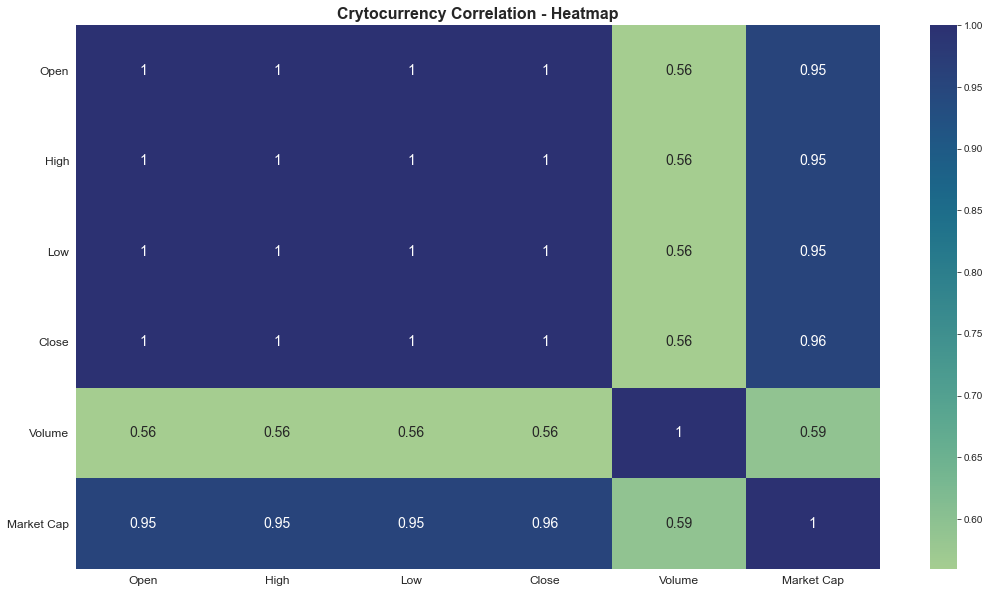

In [73]:
plt.figure(figsize=(18,10))

sns.heatmap(relevant_dataset.corr(), annot=True, cmap="crest", annot_kws={'size': 14})
plt.title('Crytocurrency Correlation - Heatmap', fontsize=16, fontweight='bold')

plt.xticks(rotation='horizontal', fontsize=12)
plt.yticks(fontsize=12, rotation='horizontal')

plt.show()

#### Apply mask to correlation data

In [74]:
ones_mask = np.ones_like(relevant_dataset.corr());
mask = np.triu(ones_mask)

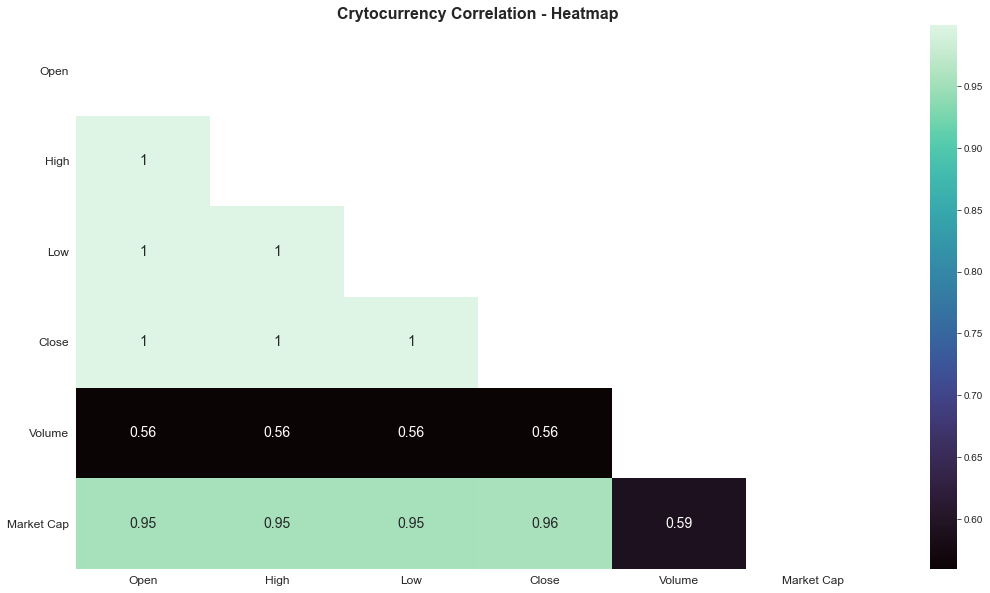

In [75]:
plt.figure(figsize=(18,10))

sns.heatmap(relevant_dataset.corr(), mask=mask, annot=True, cmap="mako", annot_kws={'size': 14})
plt.title('Crytocurrency Correlation - Heatmap', fontsize=16, fontweight='bold')

plt.xticks(rotation='horizontal', fontsize=12)
plt.yticks(fontsize=12, rotation='horizontal')

plt.show()

#### Checking VIF value

In [76]:
# the independent variables set
X = relevant_dataset[['High', 'Low', 'Open', 'Close', 'Volume', 'Market Cap']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Features"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)


     Features       VIF
0        High 2903.2465
1         Low 1492.2371
2        Open 1632.7771
3       Close 2688.7617
4      Volume    1.6333
5  Market Cap   12.3513


###  <u><center>Dashboard</center></u>

#### Create a dataset copy

In [77]:
dataset_dashboard = data.copy()

#### Check dataset copy is okay

In [78]:
dataset_dashboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Currency    28944 non-null  object
 1   Date        28944 non-null  object
 2   Open        28944 non-null  object
 3   High        28944 non-null  object
 4   Low         28944 non-null  object
 5   Close       28944 non-null  object
 6   Volume      28944 non-null  object
 7   Market Cap  28944 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB


#### Convert Open and Close cells to numeric format

In [79]:
dataset_dashboard['Open'] = dataset_dashboard['Open'].str.replace(',', '').astype(float)
dataset_dashboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Currency    28944 non-null  object 
 1   Date        28944 non-null  object 
 2   Open        28944 non-null  float64
 3   High        28944 non-null  object 
 4   Low         28944 non-null  object 
 5   Close       28944 non-null  object 
 6   Volume      28944 non-null  object 
 7   Market Cap  28944 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.8+ MB


In [80]:
dataset_dashboard['Close'] = dataset_dashboard['Close'].str.replace(',', '').astype(float)
dataset_dashboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Currency    28944 non-null  object 
 1   Date        28944 non-null  object 
 2   Open        28944 non-null  float64
 3   High        28944 non-null  object 
 4   Low         28944 non-null  object 
 5   Close       28944 non-null  float64
 6   Volume      28944 non-null  object 
 7   Market Cap  28944 non-null  object 
dtypes: float64(2), object(6)
memory usage: 1.8+ MB


#### Convert Date column to datetime format and check

In [81]:
dataset_dashboard.Date = pd.to_datetime(dataset_dashboard.Date)
dataset_dashboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Currency    28944 non-null  object        
 1   Date        28944 non-null  datetime64[ns]
 2   Open        28944 non-null  float64       
 3   High        28944 non-null  object        
 4   Low         28944 non-null  object        
 5   Close       28944 non-null  float64       
 6   Volume      28944 non-null  object        
 7   Market Cap  28944 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 1.8+ MB


In [82]:
dataset_dashboard.head()

Currency       Date   Open  High   Low  Close      Volume   Market Cap
0    tezos 2019-12-04 1.2900  1.32  1.25 1.2500  46,048,752  824,588,509
1    tezos 2019-12-03 1.2400  1.32  1.21 1.2900  41,462,224  853,213,342
2    tezos 2019-12-02 1.2500  1.26   1.2 1.2400  27,574,097  817,872,179
3    tezos 2019-12-01 1.3300  1.34  1.25 1.2500  24,127,567  828,296,390
4    tezos 2019-11-30 1.3100  1.37  1.31 1.3300  28,706,667  879,181,680

#### Select the columns being used from the dataset

In [83]:
processed_dataset_dashboard = dataset_dashboard[['Currency','Date', 'Open', 'Close']]
processed_dataset_dashboard.head()

Currency       Date   Open  Close
0    tezos 2019-12-04 1.2900 1.2500
1    tezos 2019-12-03 1.2400 1.2900
2    tezos 2019-12-02 1.2500 1.2400
3    tezos 2019-12-01 1.3300 1.2500
4    tezos 2019-11-30 1.3100 1.3300

#### Use only data from 2018

In [84]:
processed_dataset_dashboard_2018 = processed_dataset_dashboard.loc[processed_dataset_dashboard['Date'].between('2018-01-01','2018-12-31', inclusive=True)]
processed_dataset_dashboard_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4380 entries, 338 to 27234
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Currency  4380 non-null   object        
 1   Date      4380 non-null   datetime64[ns]
 2   Open      4380 non-null   float64       
 3   Close     4380 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 171.1+ KB


In [85]:
processed_dataset_dashboard_2018.head()

Currency       Date   Open  Close
338    tezos 2018-12-31 0.4985 0.4626
339    tezos 2018-12-30 0.5101 0.4982
340    tezos 2018-12-29 0.5091 0.5103
341    tezos 2018-12-28 0.4693 0.5086
342    tezos 2018-12-27 0.5249 0.4708

In [86]:
processed_dataset_dashboard_2018.tail()

Currency       Date   Open   Close
27230  bitcoin-sv 2018-01-05 9.1500 14.9200
27231  bitcoin-sv 2018-01-04 9.4500  9.2100
27232  bitcoin-sv 2018-01-03 8.7700  9.5400
27233  bitcoin-sv 2018-01-02 8.4600  8.8400
27234  bitcoin-sv 2018-01-01 8.6300  8.4100

#### Set the date as the index

In [87]:
processed_dataset_dashboard_2018.set_index('Date')

Currency   Open   Close
Date                                 
2018-12-31       tezos 0.4985  0.4626
2018-12-30       tezos 0.5101  0.4982
2018-12-29       tezos 0.5091  0.5103
2018-12-28       tezos 0.4693  0.5086
2018-12-27       tezos 0.5249  0.4708
...                ...    ...     ...
2018-01-05  bitcoin-sv 9.1500 14.9200
2018-01-04  bitcoin-sv 9.4500  9.2100
2018-01-03  bitcoin-sv 8.7700  9.5400
2018-01-02  bitcoin-sv 8.4600  8.8400
2018-01-01  bitcoin-sv 8.6300  8.4100

[4380 rows x 3 columns]

#### Add a difference column (closing values - opening values)

In [88]:
processed_dataset_dashboard_2018['Difference'] = processed_dataset_dashboard_2018['Close'] - processed_dataset_dashboard_2018['Open']

processed_dataset_dashboard_2018.head()

Currency       Date   Open  Close  Difference
338    tezos 2018-12-31 0.4985 0.4626     -0.0358
339    tezos 2018-12-30 0.5101 0.4982     -0.0119
340    tezos 2018-12-29 0.5091 0.5103      0.0012
341    tezos 2018-12-28 0.4693 0.5086      0.0393
342    tezos 2018-12-27 0.5249 0.4708     -0.0541

#### Create dashboard using pivot_ui 

Clicking or right clicking and opening in new tab on the 'pop out' value will open the dashboard in a new browser tab


In [91]:
pivot_ui(processed_dataset_dashboard_2018)


#### For use in PDF conversion
pivot_ui renders in an IFrame which is not captured as a static image when converting a notebook to a PDF file so I will insert an image here which is a screenshot of the above which is pivot_ui running after being passed a dataset but has no chart or columns selected.

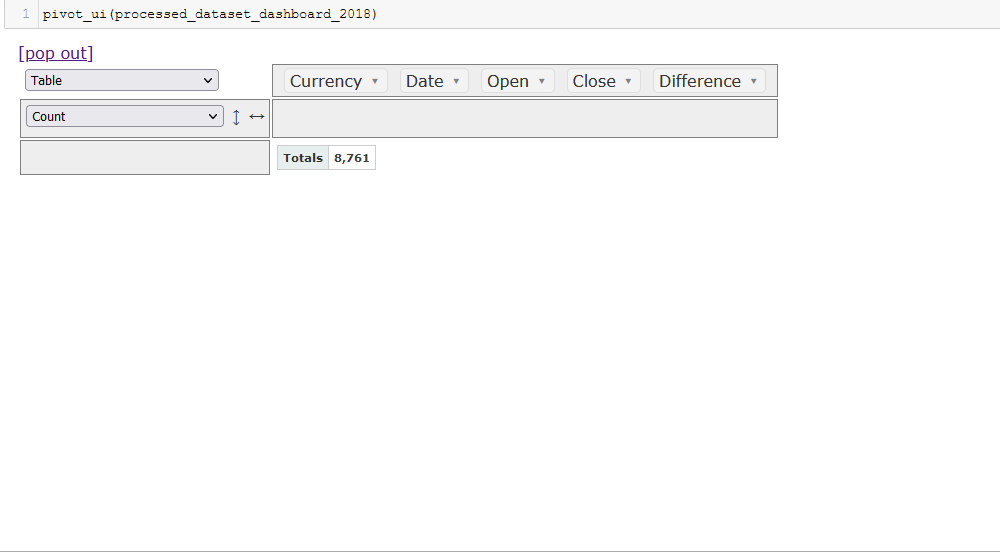

----
## <u><center>Explanations</center></u>
---- 

### <center>EDA</center>

Most if not all of exploratory data analysis consists of asking basic questions of the dataset so that the user can glean things like data types of columns, possible missing data, some elementary statistics and things like this. As usual I will check the data type of columns, from a cursory glance at this and the questions which follow I can see that some columns will be problematic unless I change their data type. 

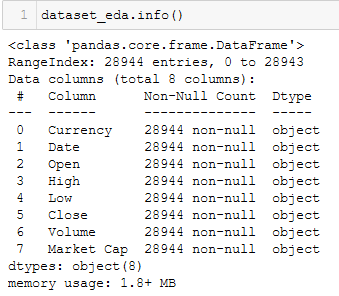

After that then I check the head and tail values in the dataset.

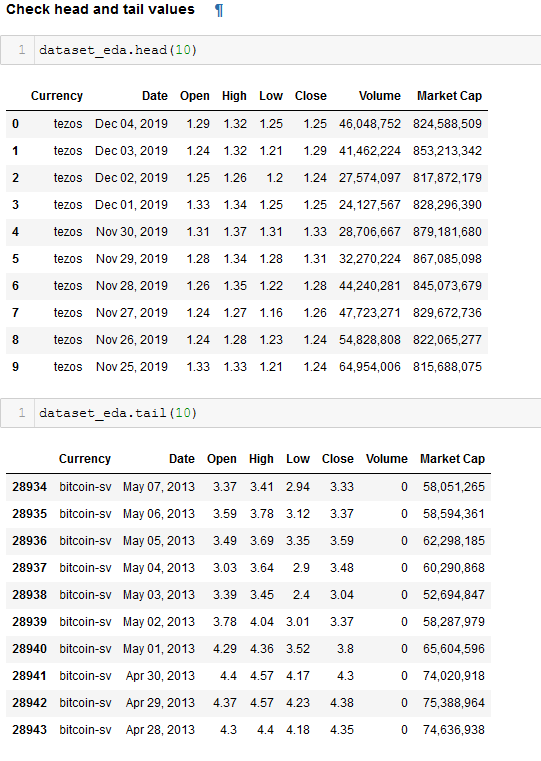

Then it is on to a check to see if there are NaN or null values which would indicate that there is missing data.

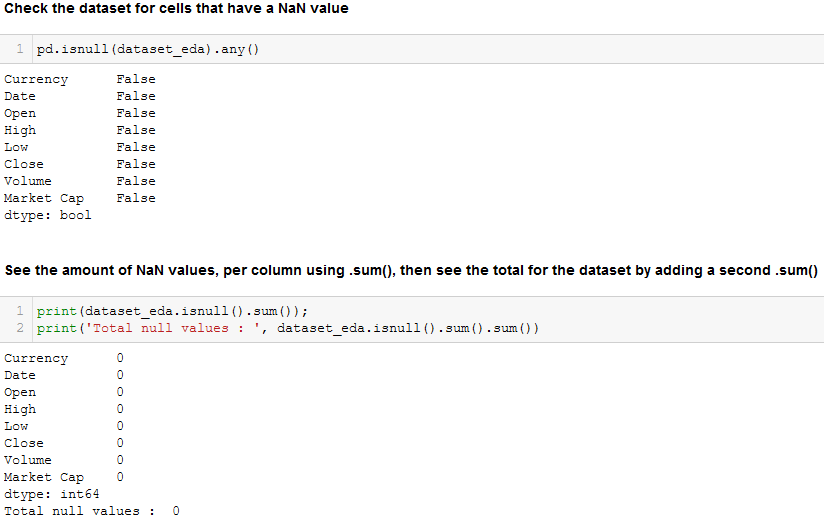

I decided to also show any missing values graphically as it shows which columns are missing values very quickly and maybe more effectively than a list of values. I used the missingno library (ResidentMario, 2021) which is a library specifically for graphic representations of missing data. I set the font size to 20 and the figure or graph size to 
14 * 10 to ensure that the graph itself was very readable, I set the coloring to a pastel shade of light green to ensure that the graph stood out from surrounds as well as not be too harsh on eyes. Finally I removed the spark line that is turned on by default as it is not needed or relevant here.

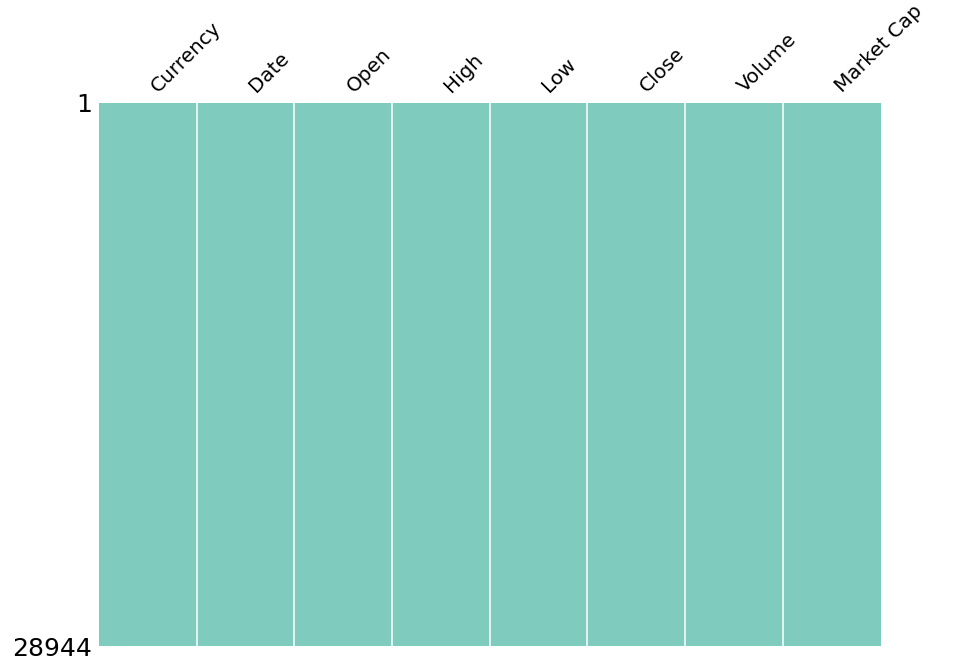

### <center>Questions</center> 

### Generate a plot that details change in the “High” value for the top 5 currencies (by high value) between 2015 and 2019

As is standard practice I start by creating a copy of the dataset in order to perform any operations I wish without damaging or compromising the original. Then I do a quick check of the dataset information as a precaution that there was no issue with making a copy.

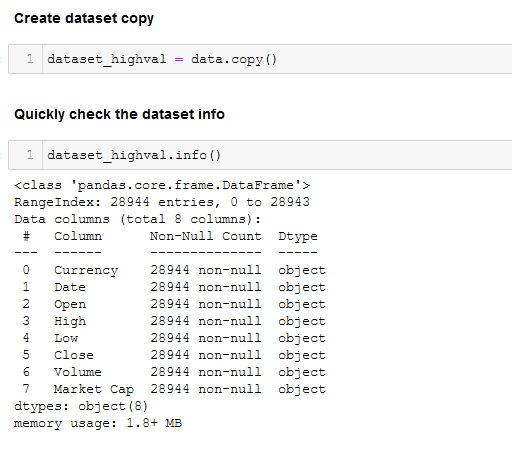

After this then I begin to process the dataset so that it can be used in plotting. The first thing that I notice needs to be changed is that the 'High' column is at the beginning of type 'Object', this will not work for plotting numeric data. This means that I need to change it to a numerical format which in this case would be float as there are values after the decimal point. There is an issue which needs to be resolved which is that some of the numbers have commas in them and they need to be removed (NewbeDEV, 2021). The same is also true of the datetime column which will need to be changed so that we can proceed with analysis. After doing the conversion then it is time for a quick check of the information to see if the columns have been changed, which they have.

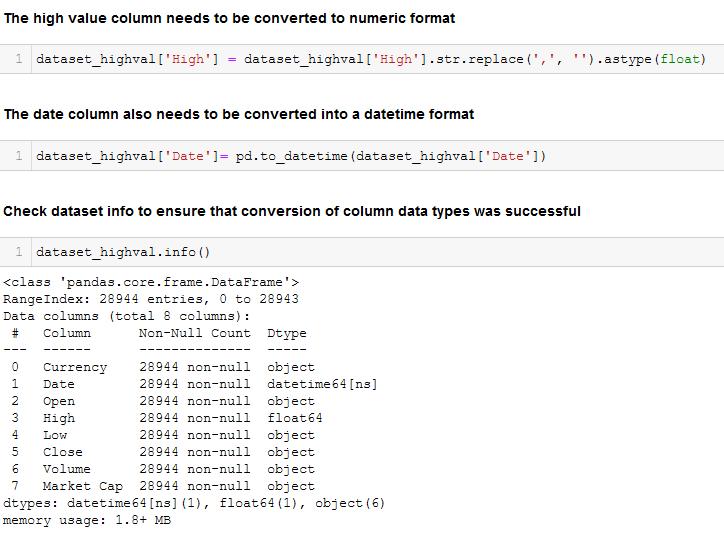

The next step then is to select only the columns that are needed which in this case are 'Currency', 'Date' and 'High'. The rest of the columns are not relevant at this point. I also thought that there would be an issue making use of the 'Date' column given the way in which it has been formatted. It uses the month name rather than a datetime so I decided that this should be changed (RoshanShah22, 2021). After changing I use the head() function to check the first few date values to ensure that the conversion had indeed been performed.

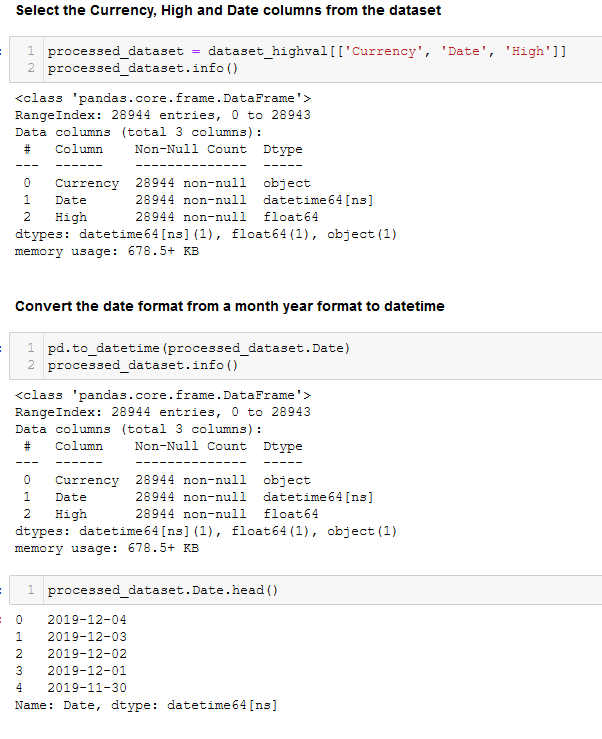

Then it is time to get the data, I examined several methods but I decided that getting the top 5 highest value currency for each year in the range 2015 - 2019 was the way to proceed. I selected each year between 1st January and 31st December, the inclusive flag is set to true so that the end date is included.

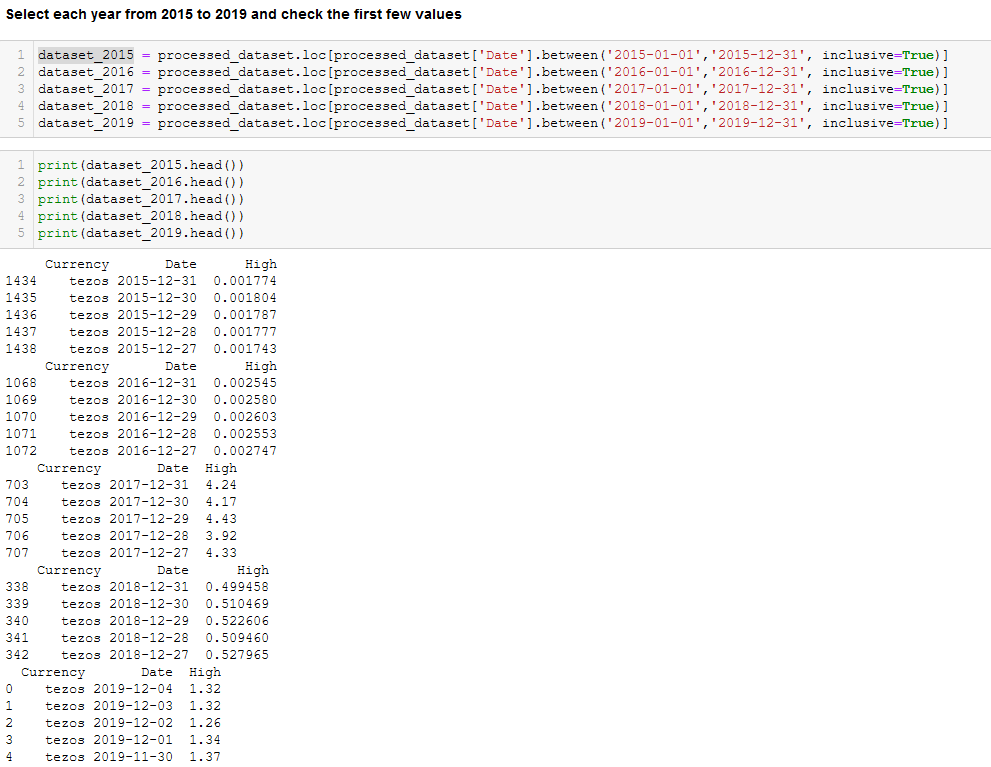

Then we can get the highest value for each of the currencies for each year, this is done by grouping the values by currency and then getting the highest value of the 'High' column. This is done using the nlargest method (Tutorial Guruji, 2021)

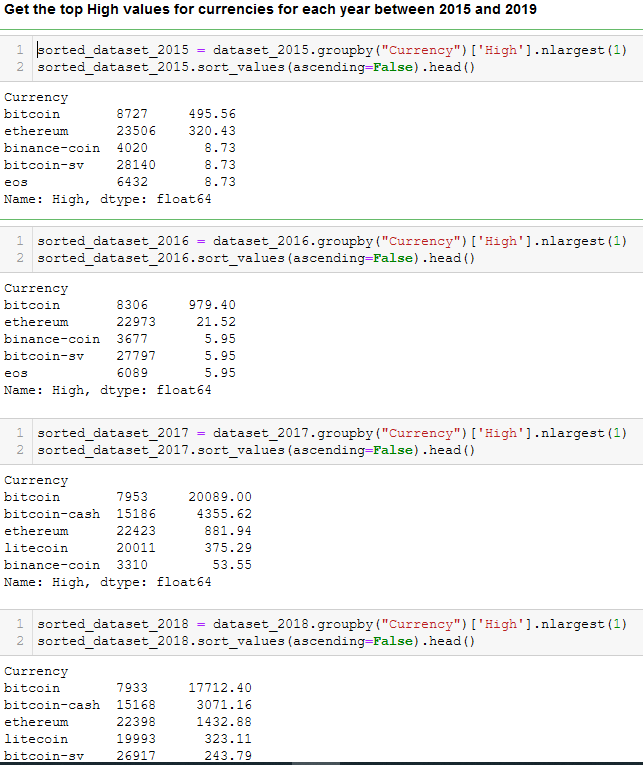

As can be seen from the above image this shows that the cryptocurrencies called binance-coin and eos slipped out of the top 5 for high values as the data headed towards 2019. It also shows that when looking at the top 5 currencies for a period, in this case 2015 - 2019 that there will be more than 5 currencies to accomodate the drop out currencies. However using more than 5 columns would cause issues when creating a dataset, so I compared the values of each currency across the time range and selected the top 5 based on which had the higher value. Once this was done then I added the values to a list, I also created a list of years covering the time period. Once created I converted the list of currencies and values to a DataFrame using the list of years as an index.

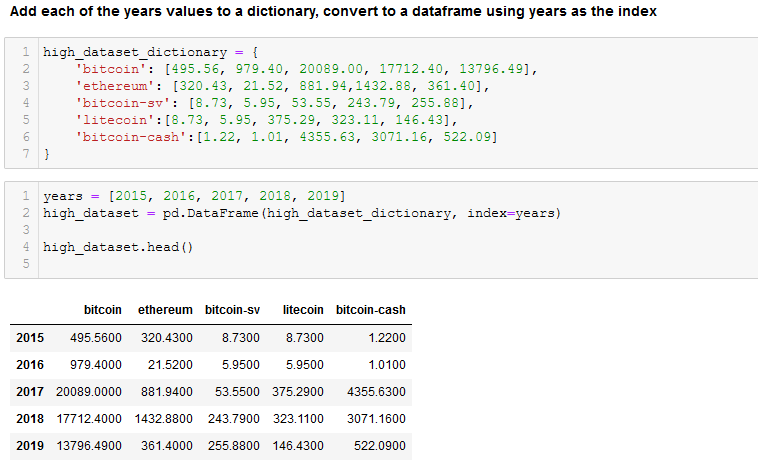

Then we can plot the graph, I used a lineplot to show the trend of the currencies over the time period as I feel that a lineplot shows much better the trends for the data over time periods that other plots such as bar plots. I then changed the font size for the legend panel to improve reability (GeeksforGeeks, 2021). Then I set about increasing the size of both the axis labels and the axis ticks and added some label padding to ensure that there was no overwriting of axis ticks by axis labels.

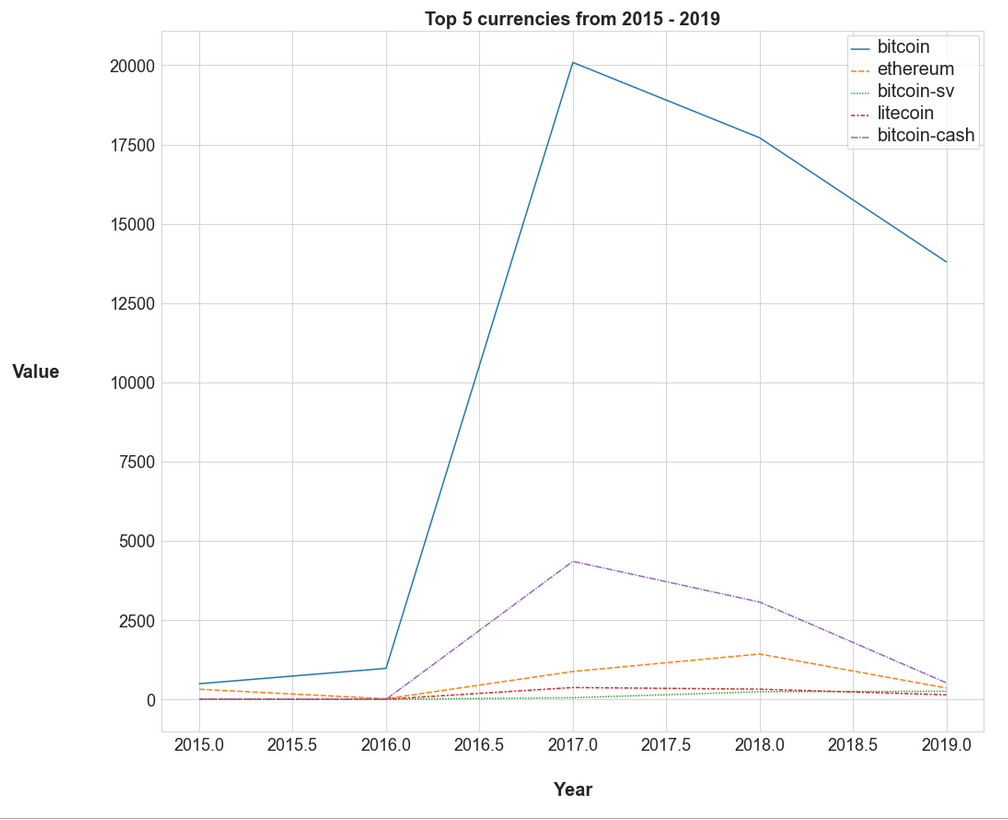

### Compare the “Open” and “Close” values for all the currencies, by month, for the year 2018

As is normal I make a copy of the dataset on which to perform the operations that are needed to answer the question. Then I check the dataset information and first few values using the head() function

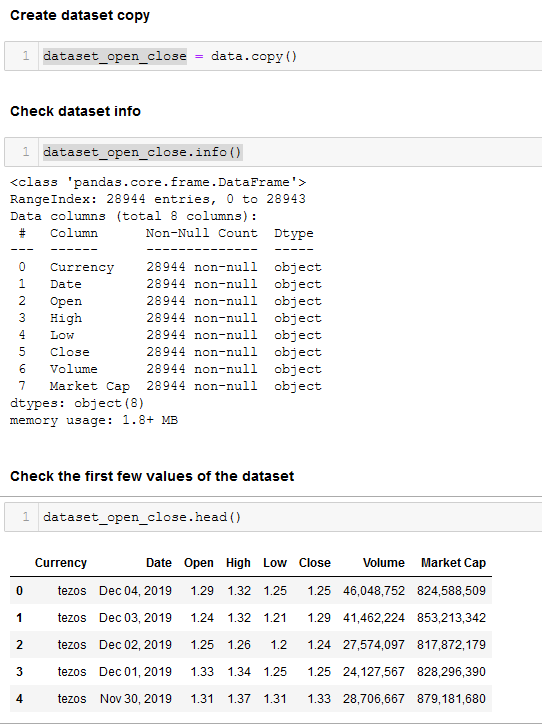

After the initial check it is time for data type conversions, in this case the 'Open' and 'Close' columns need to be in numerical format.

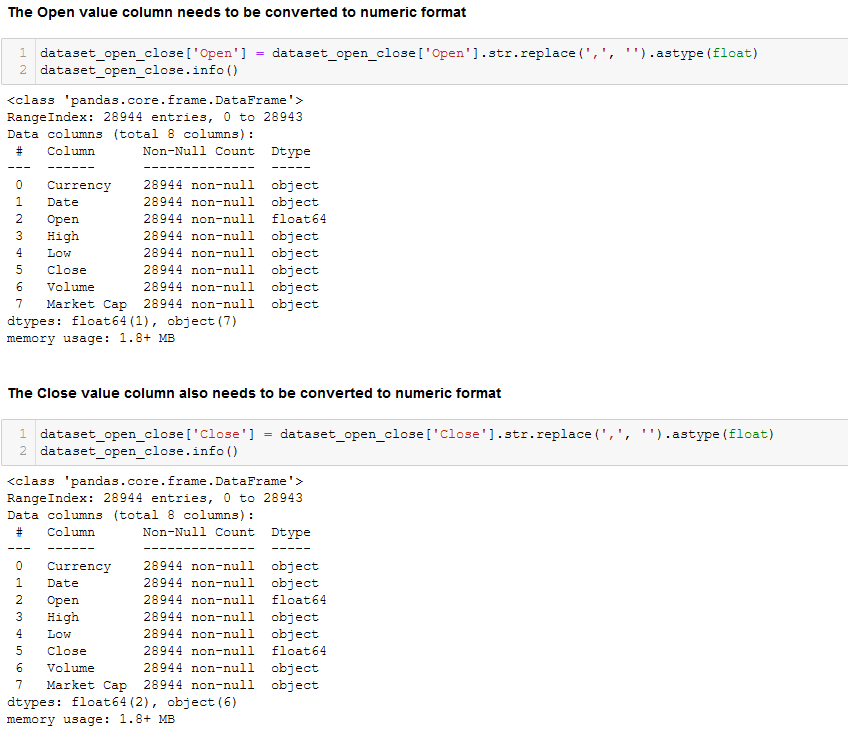

Then the 'Date' column needs to be change into datetime format as the existing object form will not allow for some of the processing needed. Then I select the parts of the dataset that I need, in this case the 'Currency', 'Date', 'Open' and 'Close' columns.

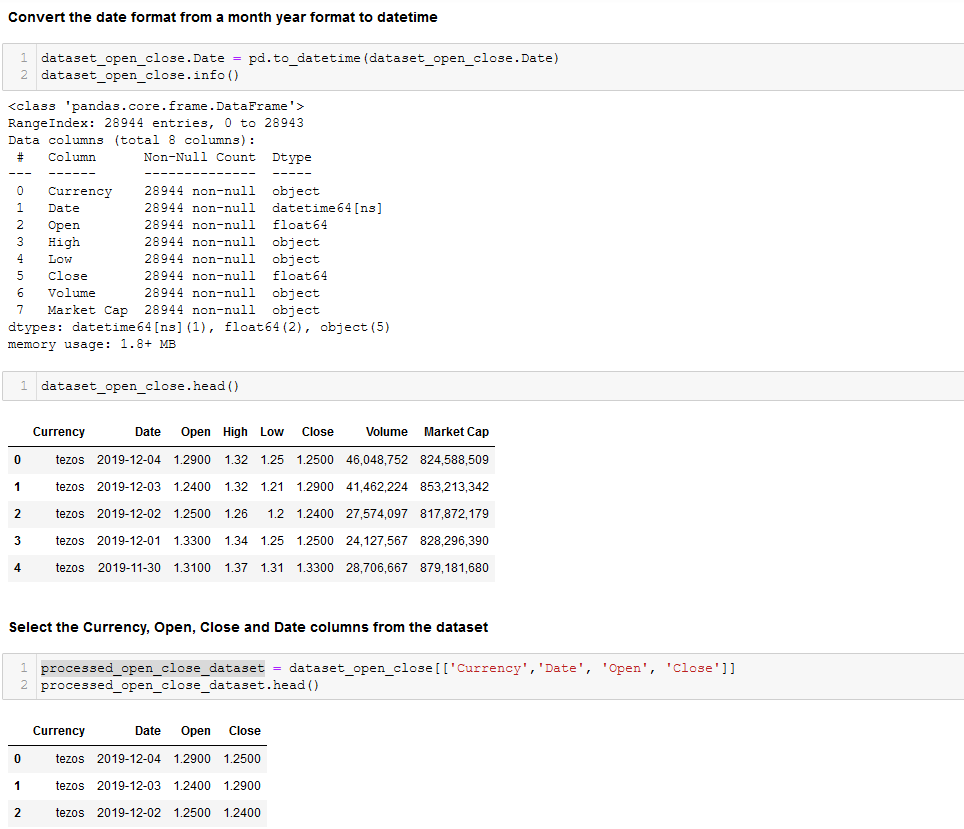

I decided to create a dataset which contained 2018 data only.

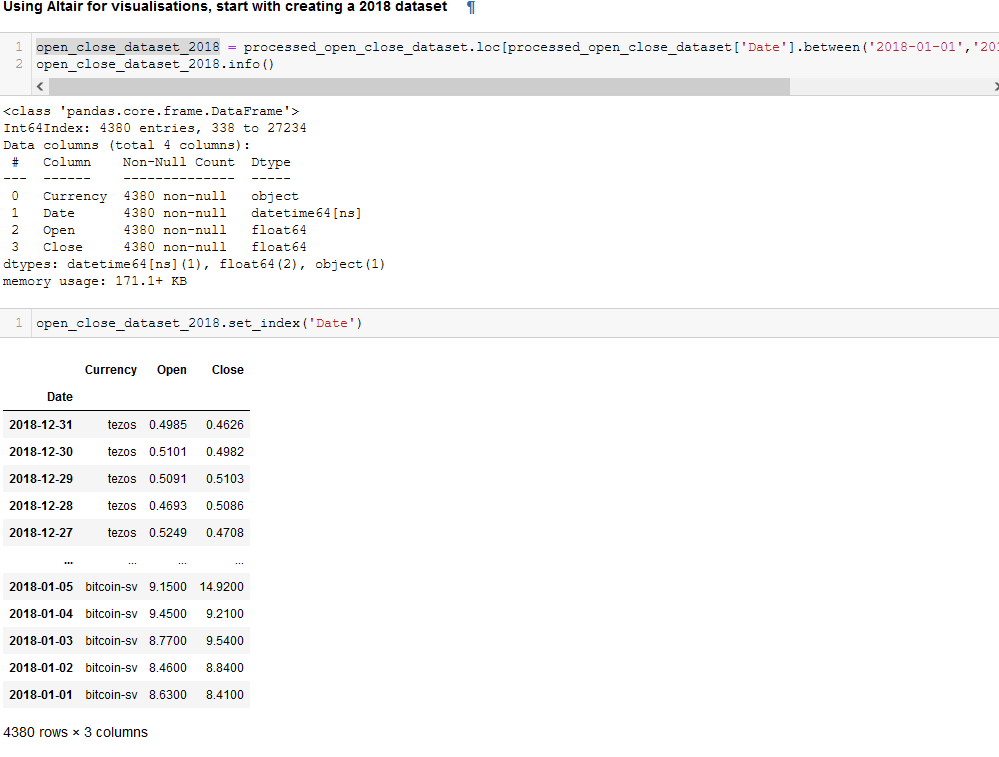

I decided to use the Altair library (Github.io, 2016) which is a very easy to use Python library for visualising data. To get started I added another column for the full year 2018 which contained the values from subtracting opening values from closing values and added the column as 'Difference'. Then I began visualisations, these are scatter plots with each point indicating a date value. Then I increased the font on each axis label, increased figure size and added a title to each plot. I also performed some width adjustments to the plots due to needing to render properly within the PDF. The first image shows the year 2018 opening values.

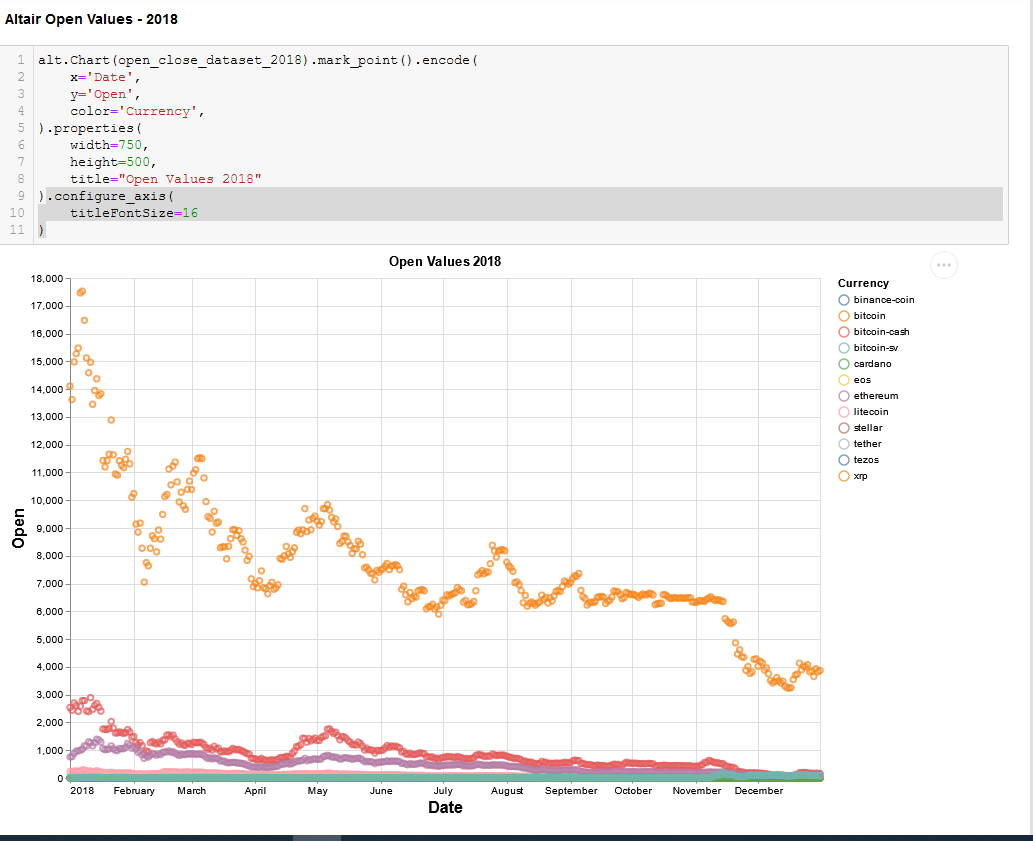

Aftes this comes the closing values.

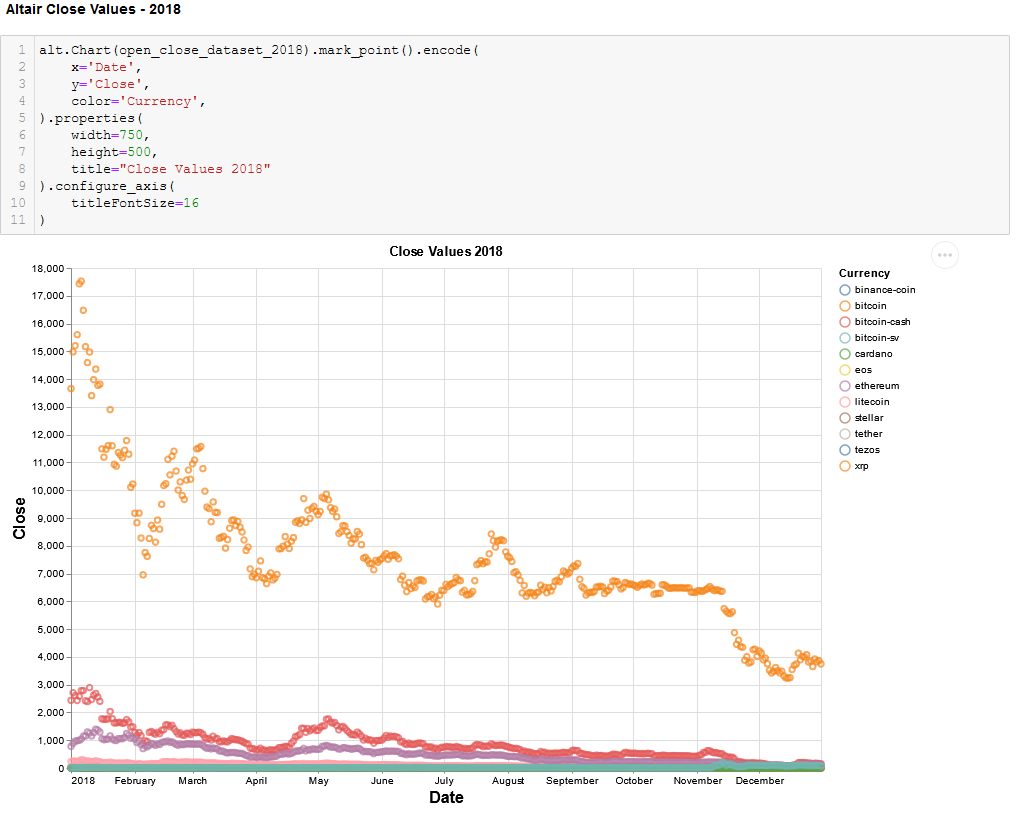

The final visualisation in the series is one that shows the differences between closing and opening values across the year. I decided this would be a good visualisation as it could help show any patterns which maybe happening across the year.

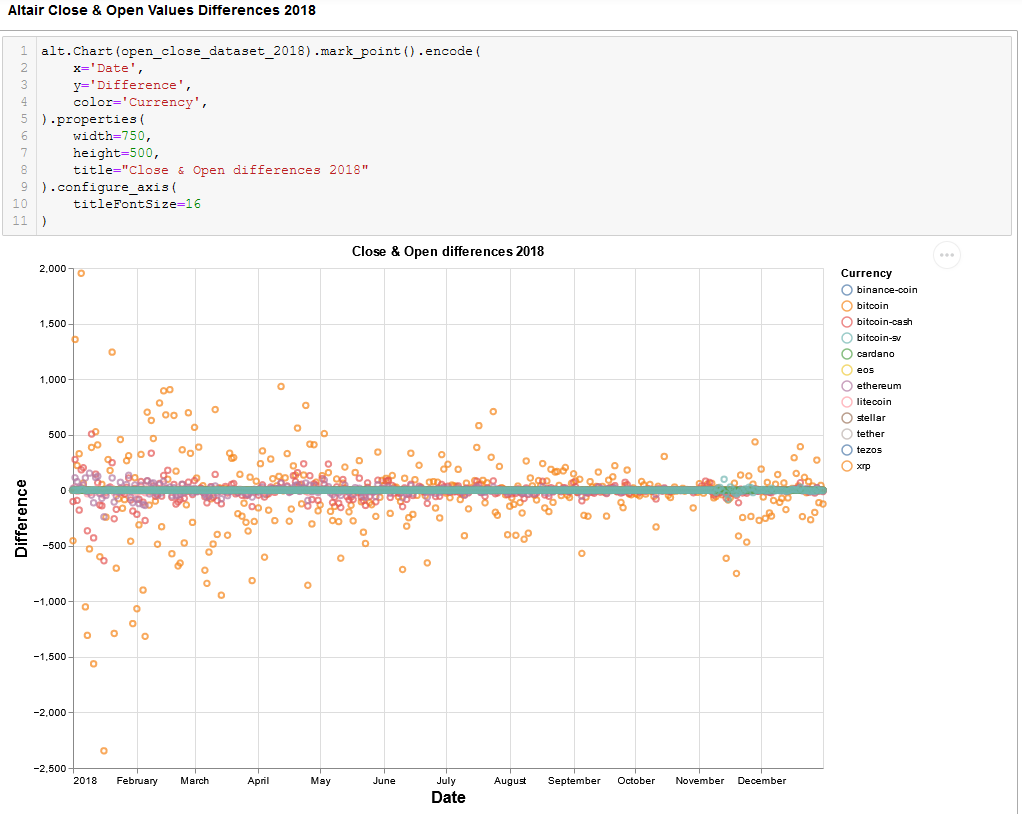

There are some noticable things about the data, the first is the disparity in value between Bitcoin and other competitor currencies. The second is the volatility of Bitcoin is much more pronounced than any other currency presumably because of the much larger valuation however when examining the visualisation the general trend shapes do stay the same for othre currencies just on a smaller scale.

### Plot a graph depicting the “Volume” by Currency between 2016 and 2019 for the top 3 Currencies (by volume) for those years.

As is standard I start by creating a copy of the dataset to work on, then I check the information is the same as the original and the first few values. 

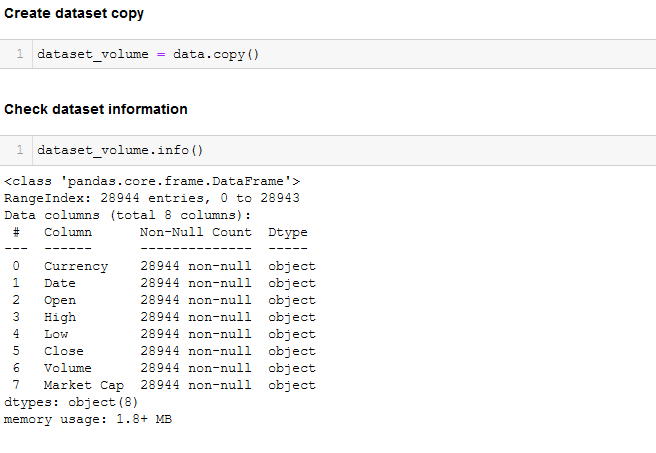

Then some column data type conversions can be performed.

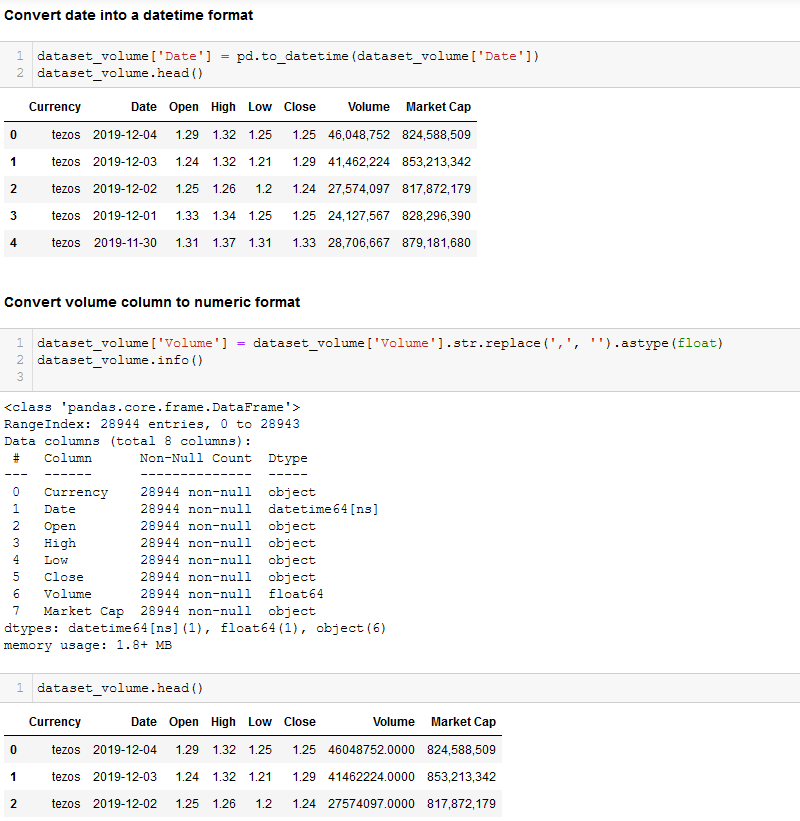

Then I will make a dataset from the columns actully needed in the question, in this case it is 'Date', 'Currency' and 'Volume'

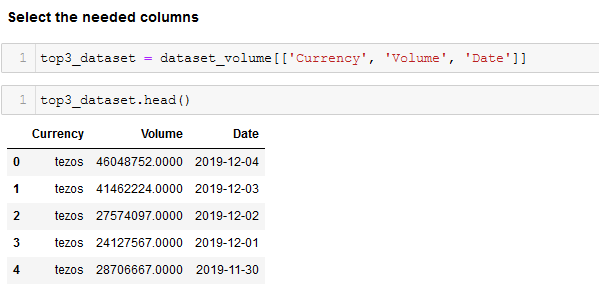

Once the conversions and column selection are complete then we can create datasets to show the top 5 cryptocurrencies by volume for each of the years in the period 2016 - 2019. 

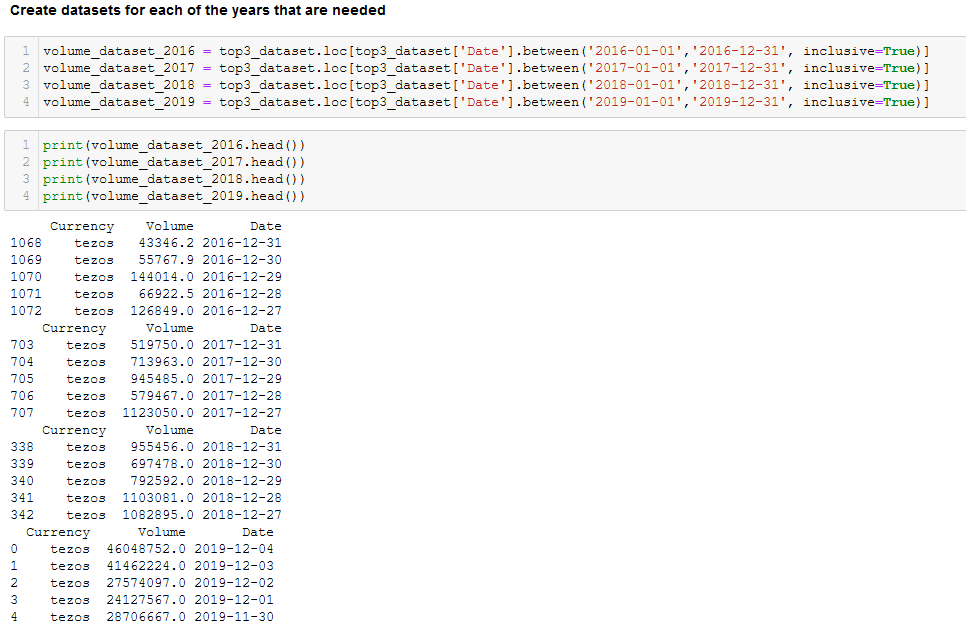

Then select the top 5 currencies by volume for each year in the period, I also used an option set when importing main packages to not use scientific notation which would be used on large numbers (Zverkova, 2019). I did this to ensure that all numbers were being displayed in the same format and avoid any issues which may arise.

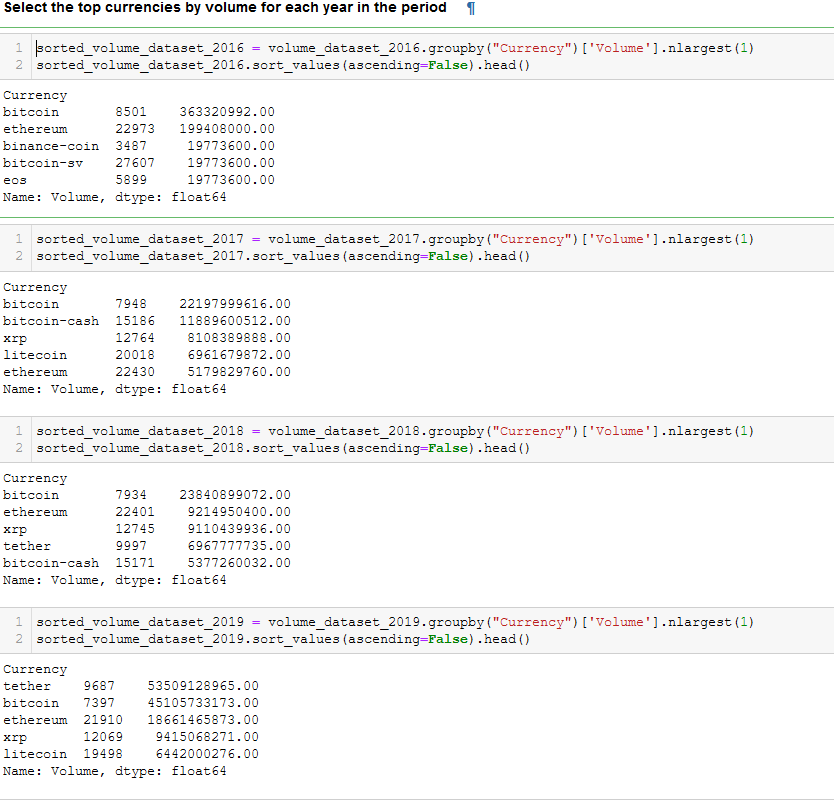

After this then we can create a dataset, which will hold the data for the top 3 currencies by volume for the time period, to get started firstly I created a list of currencies and their volumes for the period 2016 - 2019, then I created a list of the years involved. Finally I used the Pandas DateFrame() method to created a dateframe for the data and used the years as an index.

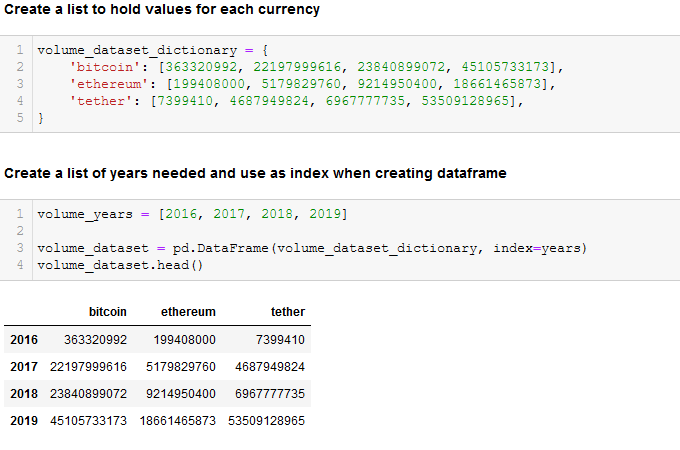

Finally I then moved on to the visualisation, I decided to use the pandas-bokeh library in this instance, mainly because of its simplicity in use (PatrikHlobil, 2021) as well its numerous options. I decided to use a line plot as it shows the data much clearer than other charts. One of this library's advantages is that it generates interactive visualisations which allow the user to focus on certain parts of the data being used. It also displays the values for all 3 currencies for a certain date when one of the lines is hovered on. I used some of the options available to increase the figure size, add a title and position a legend panel in the top left where it would not affect reading the graph.

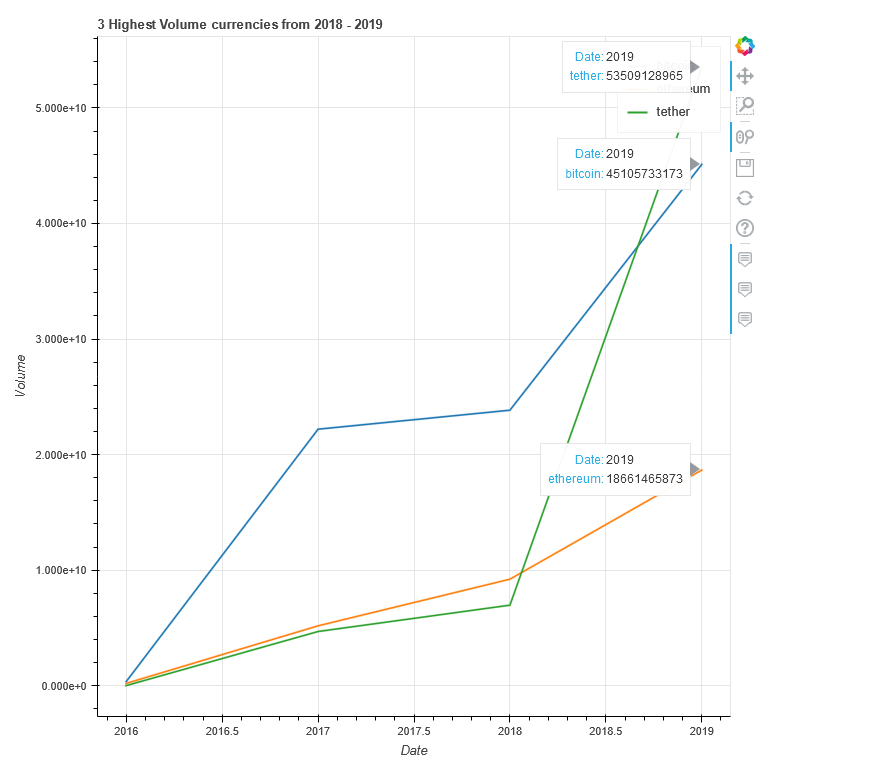

### Statistically significant question

The statistically significant question that I have decided to examine is whether there are any strong correlations among the dataset and if so are they too strong to the point of making any models unreliable. To get started as always I create a copy of the original dataset and check it. Then I begin the process of changing all the numeric columns from object data types into floating point values so that the correlation can be examined.

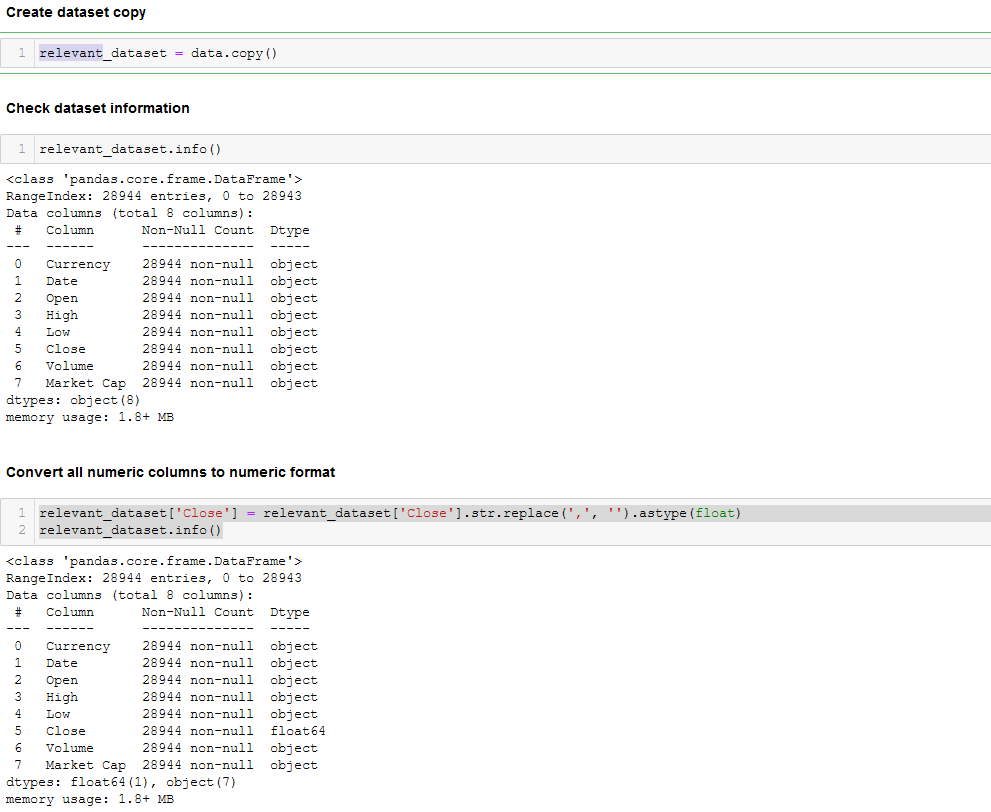

Once the conversions are concluded, this includes the date field then examining the dataset information via the info() method should show it differs greatly from when starting.

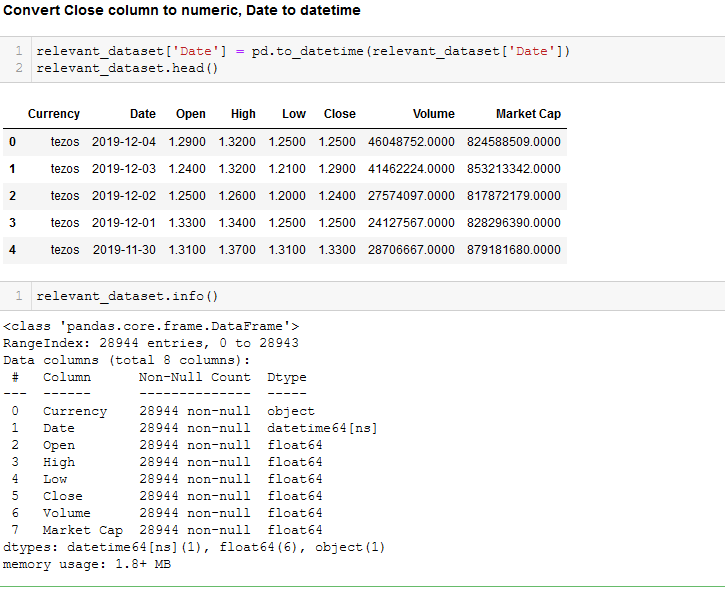

At this point then it is time to look at correlations. This can be done by applying the corr() method to the dataset. The first correlation that I looked at is in table form which does not convey as much information as a graphic representation which I will look at next.

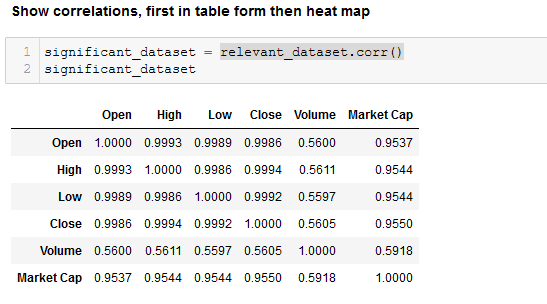

Then there is the correlation heatmap, I used the 'crest' colormap scheme as it is both clean and shows information very clearly. I also set both sets of axis ticks to horizontal for readability. I also increased the figure size and centered and boldened the plot title.

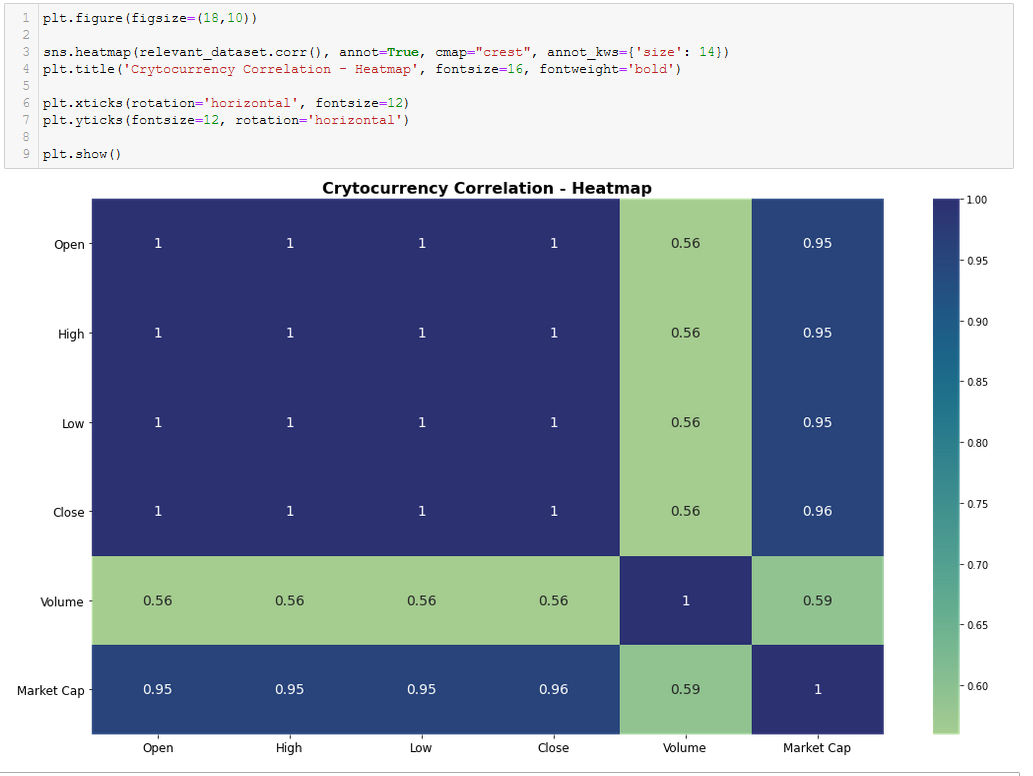

The above needs to be changed a little as it is the same data represented twice so some masking will need to be done in order to create an accurate representation of the data. Masking is done using the Numpy ones_like() function this creates a matrix of boolean values which matches the shape of the data combined with the triu() function the upper triangle of the matrix blanks out duplicate data. I changed the color scheme also to differentiate from the previous plot, I decided to use 'mako' as I felt this both was clean without being too minimal. I did try others such as 'viridis' which I found very loud and would distract from any information being displayed and 'cubehelix' which was too minimal. I kept the rest of the styling including font size and annot_kws which displays values in cells themselves.

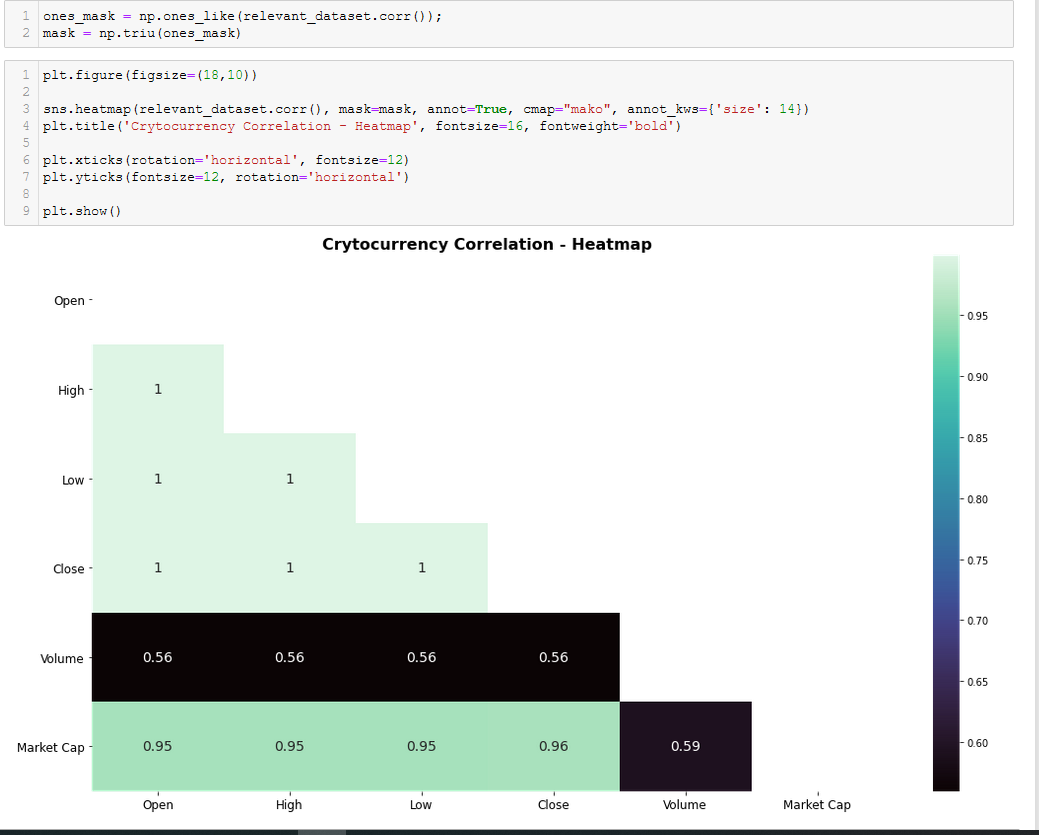

As can be seen from above several columns have very high correlation values, the only columns that don't have high correlation are 'Market Cap' and 'Volume'. I think that it would be a good idea to check the dataset for multicolinearity which is where there are several columns that are highly correlated and their effects may not be distinguishable on a dependent variable if we were looking at regression (GeeksforGeeks, 2020).

There are several different ways of finding multicolinearity, one of the best known is the VIF factor which is where a feature or column is regressed against all other columns. The formula is below,

#### <center>VIF Formula</center>
$$ VIF = \frac{1}{(1 - R ^ 2)} $$


In order to check the VIF the statsmodels package will have to be installed, this can be done via the Pip installer. Then I selected all the columns that are numeric to run VIF against, the 'High' column would be the dependent variable and everything would be checked for their VIF number in relation to this. As can be seen as is to be expected the values that had high correlations had very high VIF values, the others were more towards normal values.

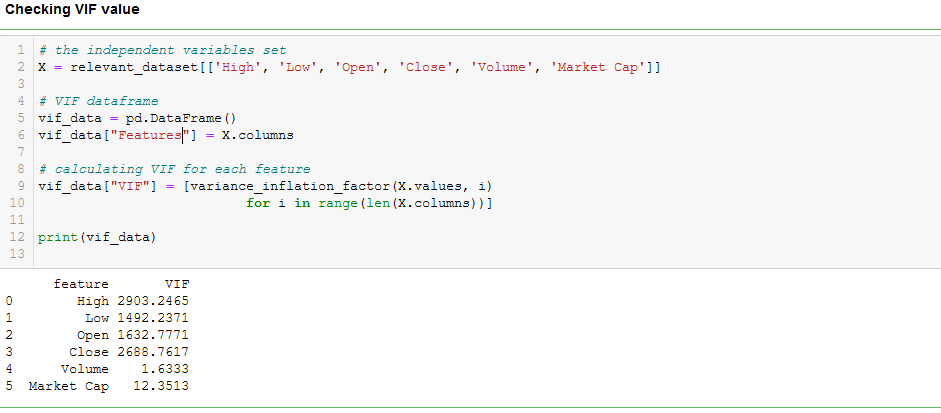

As seen above there are some values which are above 10, values above 10 indicate that there is high multicolinearity(Heckman, 2015). This means that any regression calculations that would be performed would not be that reliable so would need the dataset to be changed in order to reduce the high correlation and VIF values.

### <center>Dashboard</center>

The question that I have chosen to use for creating a dashboard is looking at the opening and closing values for each month in 2018. I am using this example as I think that the question has the opportunity for more interaction than the other.

I applied all the same operations as I had done when answering the question originally to get the dataset to the same point, which is were I can begin adding it to a dashboard. For the dashboard I decided to use the pivottablejs library (nicolaskruchten, 2018). This is a library which allows for the drag and drop to create tables and charts. I will show this process here as well as giving my reasons for choosing this library.

After installing and importing the pivottablejs library it is very easy to get it started using a dataset. Below is an image that shows how easy it is. This is the first of my reasons for using the library, I tried several other alternatives that overdid the complexity and would need a lot of work to gain competence.

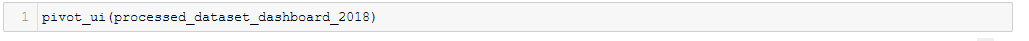

This leads to the second of my reasons for using this library and that is when running it can be in either a Jupyter cell or a separate browser tab. I think that using a separate browser tab maybe the better approach in some circumstances as although the default width and height can be adjusted using code a dedicated browser window offers more space and therefore more opportunity to make a presentation easier as there would be no scrolling involved. The first image shows the basic window in a cell.

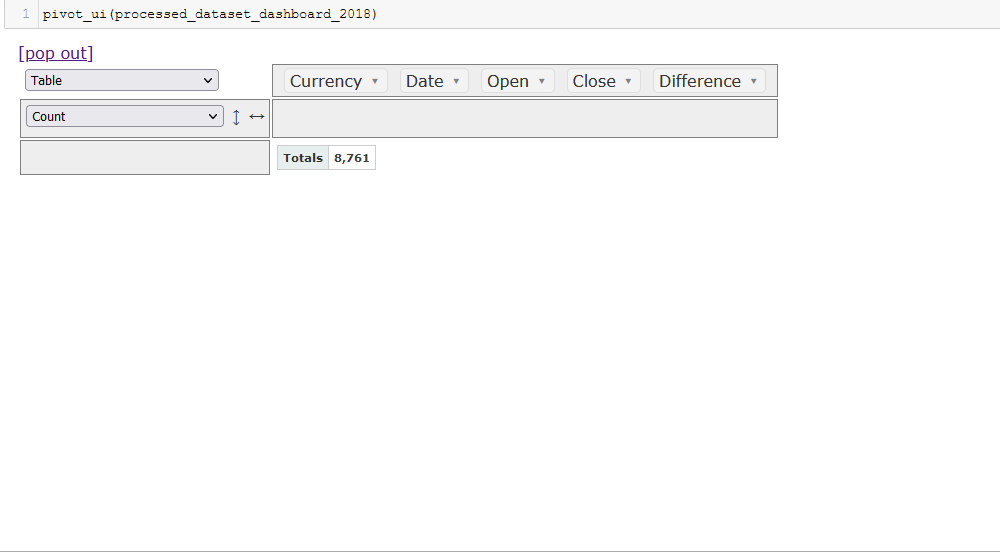

After this then is the same window running in a separate tab. This can be reached either by clicking on 'pop out' or right clicking on it and selecting 'Open in new tab'

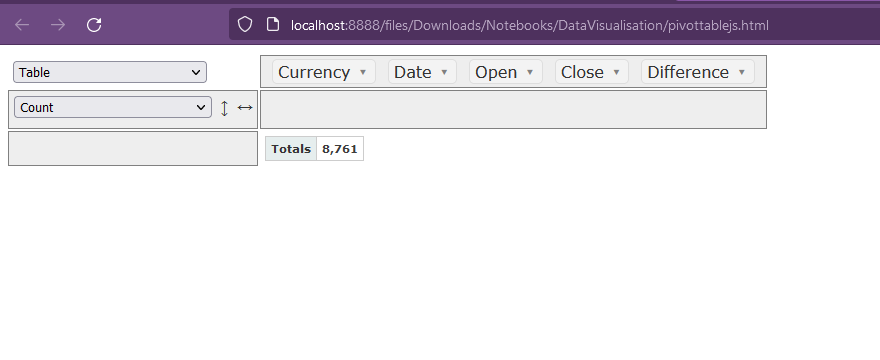

After that then comes what is the most persuasive factor in using this library and that is its flexibility. After loading a dataset and starting up pivottablejs there are a plethora of options available. This is because with pivottablejs not only can multiple different charts and calculations be used but the columns that they are performed on can be dragged and dropped and re-ordered as desired. The image below shows the amount of charts available.

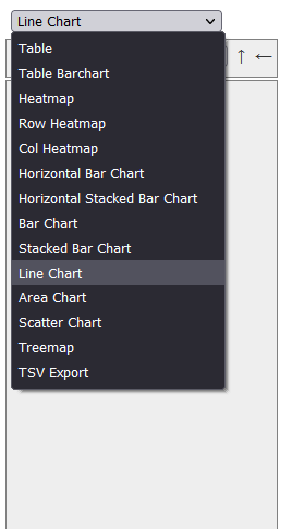

Then is the amount of different calculations that can be shown.

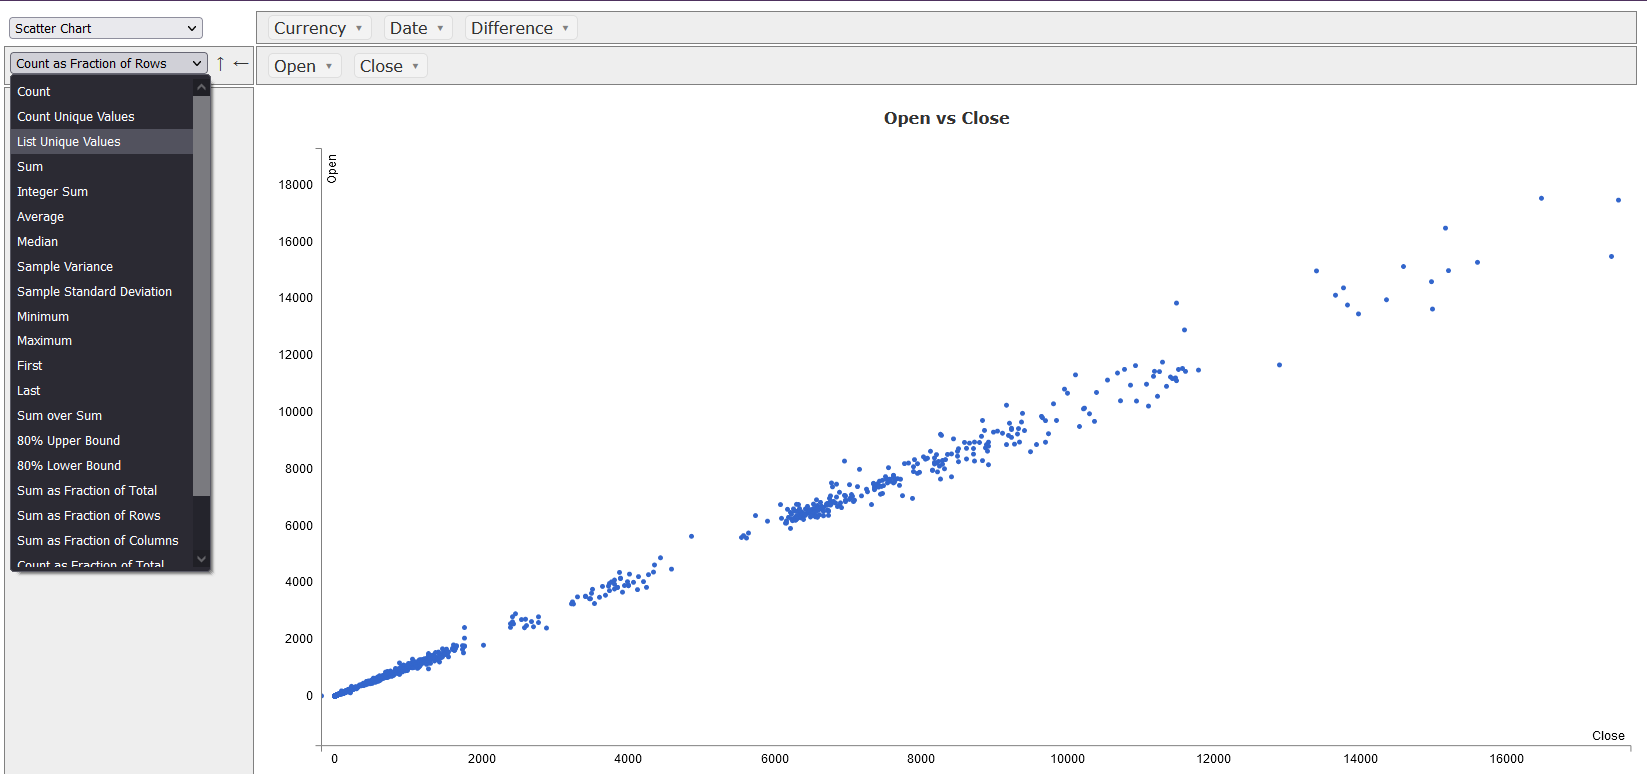

One sample graph that I did was a scatter plot, I will start off with a blank plot.

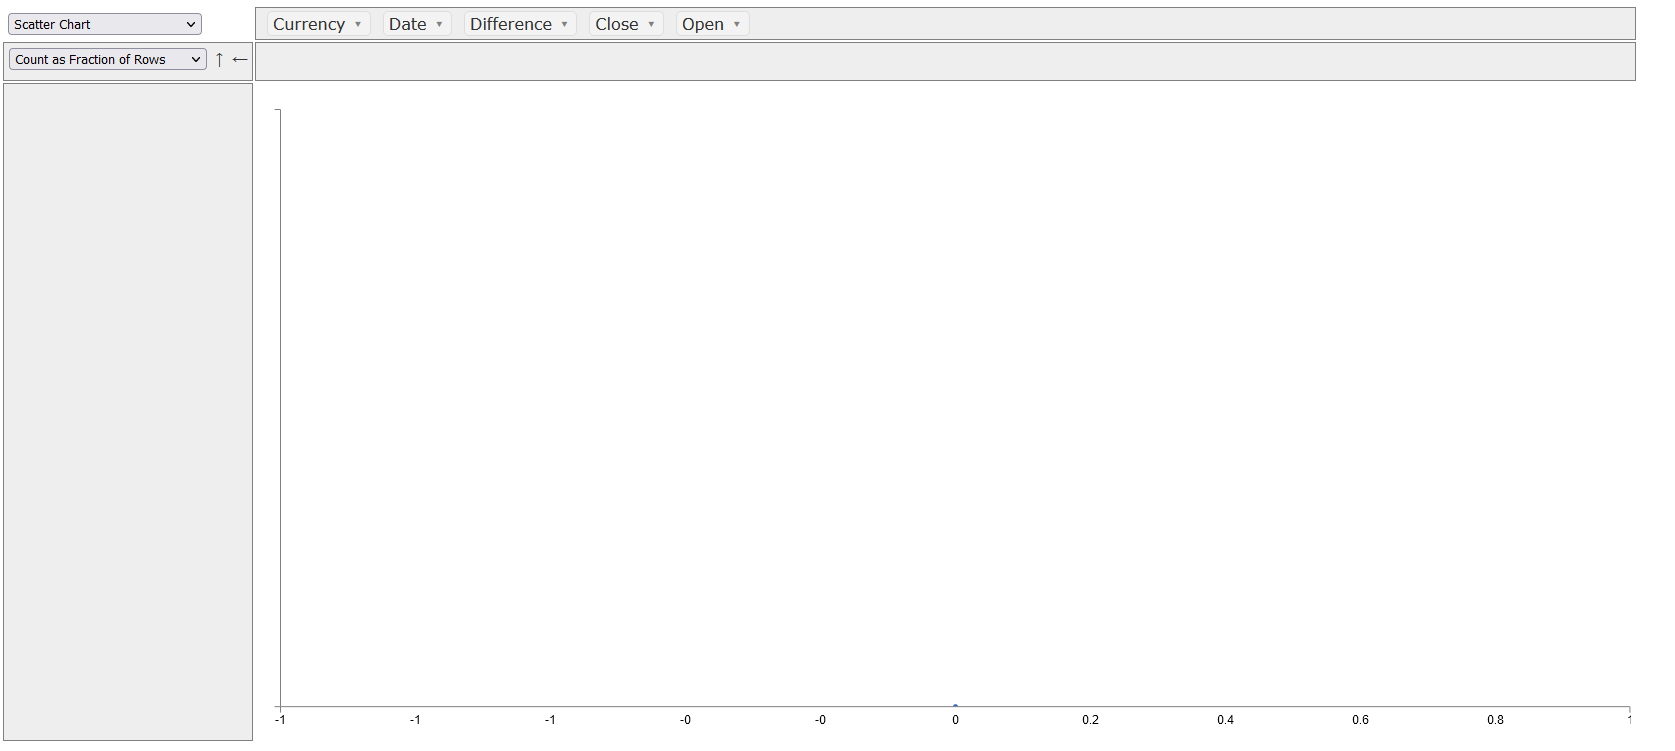

Then I made a couple of selections, in this case it was to compare open values to close values. I simply dragged the Open and Close buttons down to the level below and the dashboard pulls them in automatically as the axis values, it also automatically generates a plot title. It should also be noted that if changes are made such as adding or removing a column then the plot automatically rerenders.

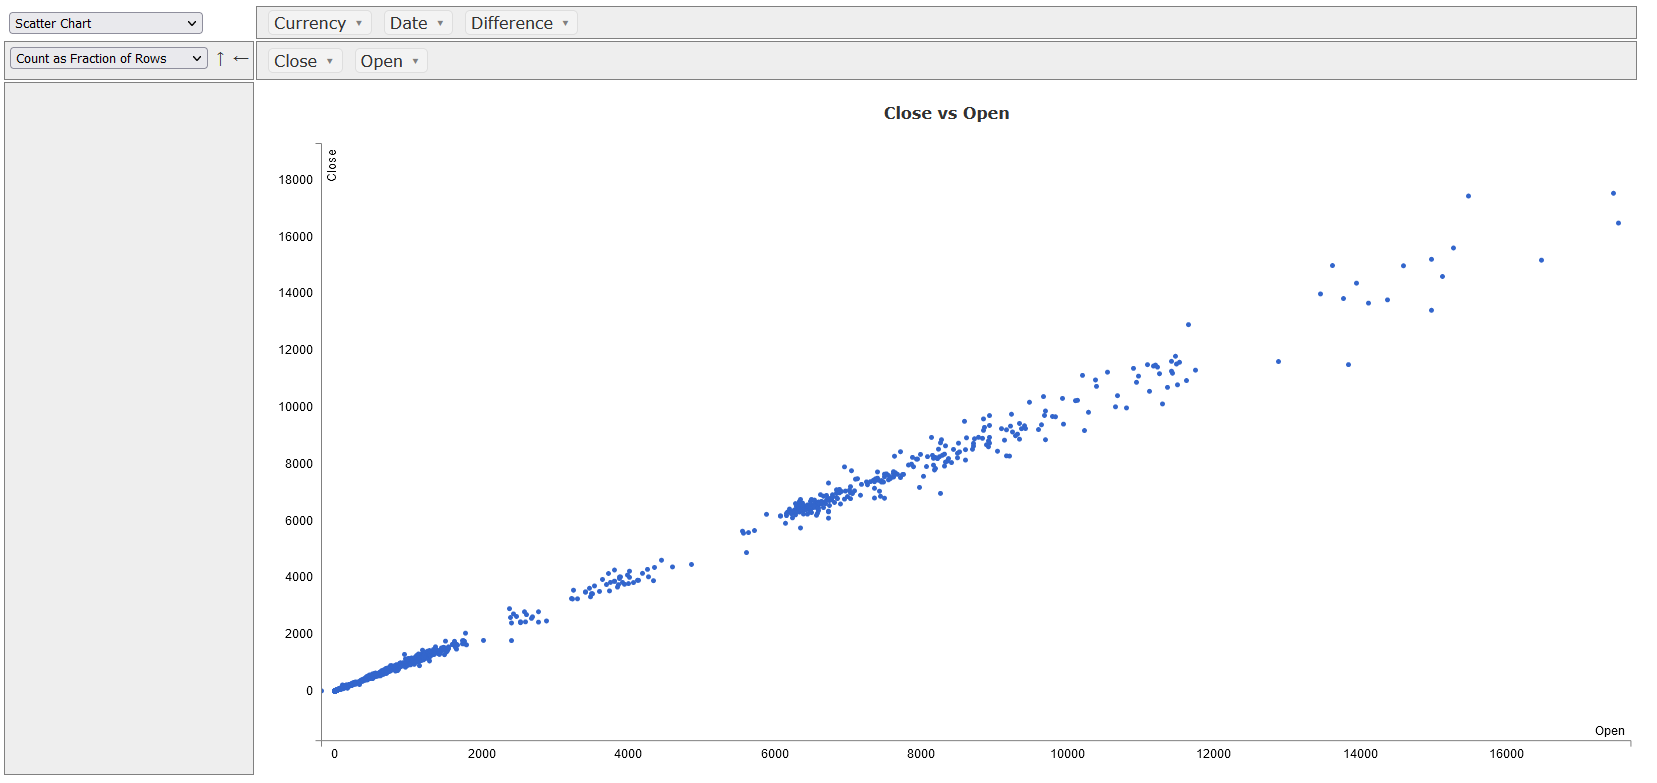

I also did this chart in a Jupyter cell to showcase a separate tab being a better option.

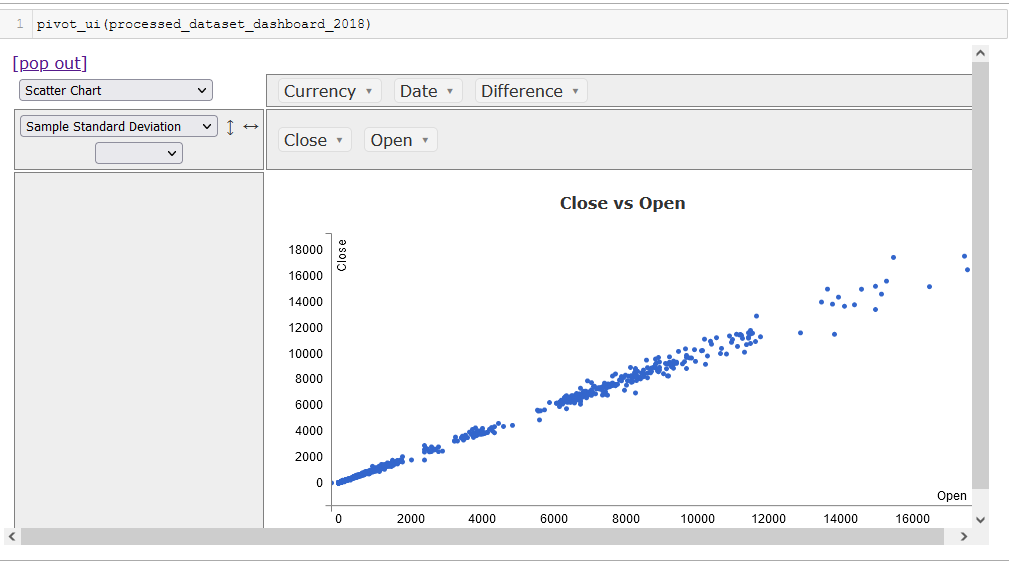

One final piece of flexibility is that within certain buttons there are arrows which allow for specifying not just a column but a value of this column. This makes it very easy to be able to see very fine grained information very quickly and very easily which could be invaluable if presenting to a group with multiple different stakeholders. The below example shows the same open vs close chart with the currency drop down which would show the chart then appied to a single currency.

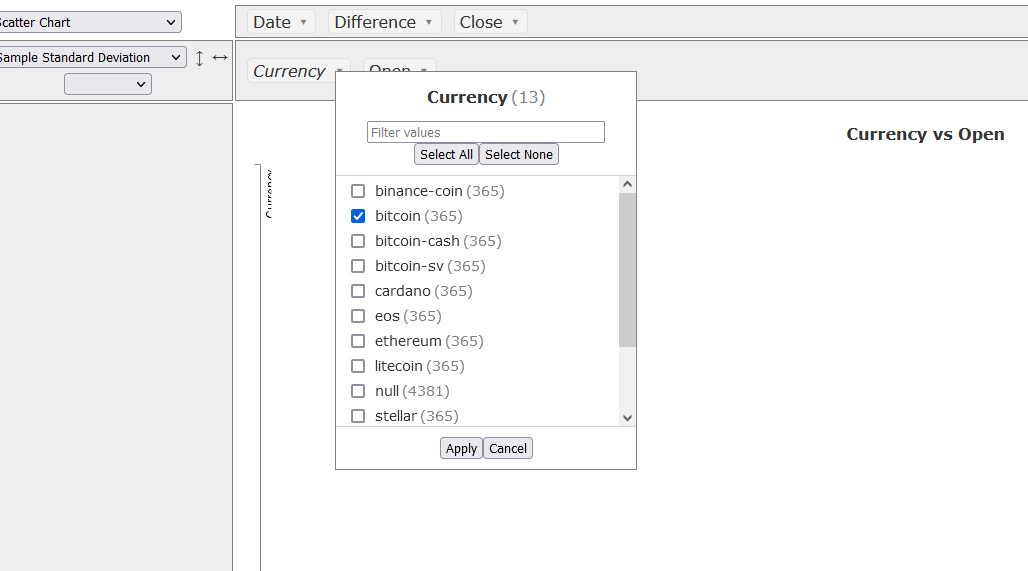

I hope that I have made a compelling case for using pivottablejs, I think that the sheer amount of flexibility that it could offer presentations should give anybody food for thought as this could be very useful on many different types of datasets. 

### <center>Additional Notes</center>

When using Bokeh a user needs to output the chart, to output to a notebook cell the user needs to add the output_notebook() to a cell. The other option is to output the chart to a file but in this case the notebook is the place for output. 

## <u><center>References</center></u>

darkpool (2015). Select DataFrame rows between two dates. [online] Stack Overflow. Available at: https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates [Accessed 7 Dec. 2021].

GeeksforGeeks. (2020). Detecting Multicollinearity with VIF - Python - GeeksforGeeks. [online] Available at: https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/ [Accessed 19 Dec. 2021].

GeeksforGeeks. (2021). How to change Seaborn legends font size, location and color? - GeeksforGeeks. [online] Available at: https://www.geeksforgeeks.org/how-to-change-seaborn-legends-font-size-location-and-color/ [Accessed 16 Dec. 2021].

GeeksforGeeks. (2021b). How to Convert Categorical Variable to Numeric in Pandas? - GeeksforGeeks. [online] Available at: https://www.geeksforgeeks.org/how-to-convert-categorical-variable-to-numeric-in-pandas/ [Accessed 18 Dec. 2021].

Github.io. (2016). Altair: Declarative Visualization in Python — Altair 4.2.0rc1 documentation. [online] Available at: https://altair-viz.github.io/ [Accessed 20 Dec. 2021].

Heckman, E. (2015b). What in the World Is a VIF? [online] Minitab.com. Available at: https://blog.minitab.com/en/starting-out-with-statistical-software/what-in-the-world-is-a-vif [Accessed 19 Dec. 2021].

Interviewqs.com. (2021). Extract month and year to a new column in Pandas | Data Interview Questions. [online] Available at: https://www.interviewqs.com/ddi-code-snippets/extract-month-year-pandas [Accessed 17 Dec. 2021].

NewbeDEV. (2021). Convert number strings with commas in pandas DataFrame to float | Newbedev. [online] Available at: https://newbedev.com/convert-number-strings-with-commas-in-pandas-dataframe-to-float [Accessed 6 Dec. 2021].

nicolaskruchten (2018). GitHub - nicolaskruchten/jupyter_pivottablejs: Drag’n’drop Pivot Tables and Charts for Jupyter/IPython Notebook, care of PivotTable.js. [online] GitHub. Available at: https://github.com/nicolaskruchten/jupyter_pivottablejs [Accessed 21 Dec. 2021].

ResidentMario (2021). GitHub - ResidentMario/missingno: Missing data visualization module for Python. [online] GitHub. Available at: https://github.com/ResidentMario/missingno [Accessed 14 Dec. 2021].

RoshanShah22 (2021). Convert string Month-Year to datetime in pandas dataframe. [online] Stack Overflow. Available at: https://stackoverflow.com/questions/65612231/convert-string-month-year-to-datetime-in-pandas-dataframe [Accessed 7 Dec. 2021].

Tutorial Guruji. (2021). Select top n items in a pandas groupby and calculate the mean - Tutorial Guruji. [online] Available at: https://www.tutorialguruji.com/python/select-top-n-items-in-a-pandas-groupby-and-calculate-the-mean/ [Accessed 14 Dec. 2021].

Zverkova, A. (2019). How to suppress scientific notation in Pandas. [online] Re-thought. Available at: https://re-thought.com/how-to-suppress-scientific-notation-in-pandas/ [Accessed 16 Dec. 2021].